In [1]:
%matplotlib notebook
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
marketing_data = pd.read_csv('marketing_data (2).csv')
marketing_data.head()

id  YearBirth   Education MaritalStatus       Income  Kidhome  Teenhome  \
0   1826       1970  Graduation      Divorced  $84,835.00         0         0   
1      1       1961  Graduation        Single  $57,091.00         0         0   
2  10476       1958  Graduation       Married  $67,267.00         0         1   
3   1386       1967  Graduation      Together  $32,474.00         1         1   
4   5371       1989  Graduation        Single  $21,474.00         1         0   

   Recency  MntWines  MntFruits  ...  NumStorePurchases  NumWebVisitsMonth  \
0        0       189        104  ...                  6                  1   
1        0       464          5  ...                  7                  5   
2        0       134         11  ...                  5                  2   
3        0        10          0  ...                  2                  7   
4        0         6         16  ...                  2                  7   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             1   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             1             0             0             0             0   

   Response  Complain  Country  
0         1         0       SP  
1         1         0       CA  
2         0         0       US  
3         0         0      AUS  
4         1         0       SP  

[5 rows x 27 columns]

In [3]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   YearBirth            2240 non-null   int64 
 2   Education            2240 non-null   object
 3   MaritalStatus        2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Recency              2240 non-null   int64 
 8   MntWines             2240 non-null   int64 
 9   MntFruits            2240 non-null   int64 
 10  MntMeatProducts      2240 non-null   int64 
 11  MntFishProducts      2240 non-null   int64 
 12  MntSweetProducts     2240 non-null   int64 
 13  MntGoldProducts      2240 non-null   int64 
 14  NumDealsPurchases    2240 non-null   int64 
 15  NumWebPurchases      2240 non-null   int64 
 16  NumCat

In [4]:
marketing_data.Income.isnull().sum()


24

In [5]:
marketing_data.describe()

id    YearBirth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.750000     1.000000        16.000000         3.000000   
50%     173.500000     8.000000        67.000000        12.000000   
75%     504.250000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  ...  NumCatalogPurchases  NumStorePurchases  \
count       2240.000000  ...          2240.000000        2240.000000   
mean          27.062946  ...             2.662054           5.790179   
std           41.280498  ...             2.923101           3.250958   
min            0.000000  ...             0.000000           0.000000   
25%            1.000000  ...             0.000000           3.000000   
50%            8.000000  ...             2.000000           5.000000   
75%           33.000000  ...             4.000000           8.000000   
max          263.000000  ...            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Response     Complain  
count   2240.000000   2240.000000  2240.000000  2240.000000  
mean       0.064286      0.013393     0.149107     0.009375  
std        0.245316      0.114976     0.356274     0.096391  
min        0.000000      0.000000     0.000000     0.000000  
25%        0.000000      0.000000     0.000000     0.000000  
50%        0.000000      0.000000     0.000000     0.000000  
75%        0.000000      0.000000     0.000000     0.000000  
max        1.000000      1.000000     1.000000     1.000000  

[8 rows x 23 columns]

DATA CLEANING

In [6]:
marketing_data['Income'] = marketing_data['Income'].replace('[\$,]', '', regex=True).astype(float)
marketing_data['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [7]:
marketing_data.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', x).lower() for x in marketing_data.columns]
marketing_data.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'recency', 'mnt_wines', 'mnt_fruits', 'mnt_meat_products',
       'mnt_fish_products', 'mnt_sweet_products', 'mnt_gold_products',
       'num_deals_purchases', 'num_web_purchases', 'num_catalog_purchases',
       'num_store_purchases', 'num_web_visits_month', 'accepted_cmp3',
       'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1', 'accepted_cmp2',
       'response', 'complain', 'country'],
      dtype='object')

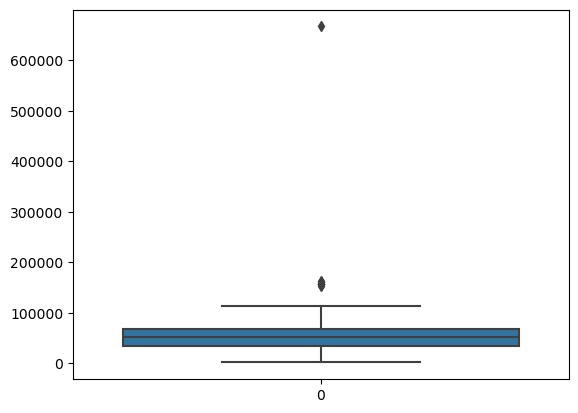

<Figure size 640x480 with 0 Axes>

In [8]:
plt.figure()
sns.boxplot(marketing_data["income"])
plt.show()
plt.clf()

In [9]:
marketing_data = marketing_data[marketing_data['income'] < 200000]
marketing_data['income'].describe()

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: income, dtype: float64

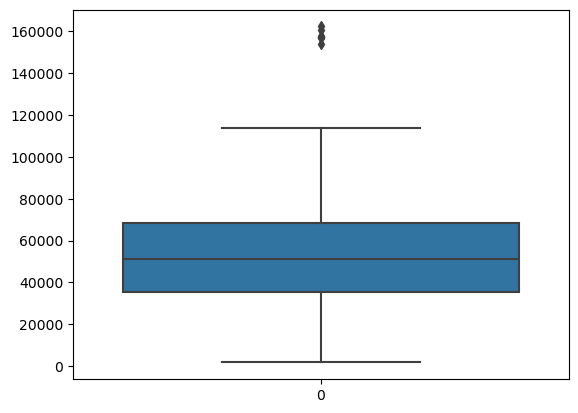

<Figure size 640x480 with 0 Axes>

In [13]:
# Check for Income outliar
plt.figure()
sns.boxplot(marketing_data["income"])
plt.show()
plt.clf()

In [14]:
# replace missing values with the mean income
marketing_data['income'] = marketing_data['income'].fillna(marketing_data['income'].mean())

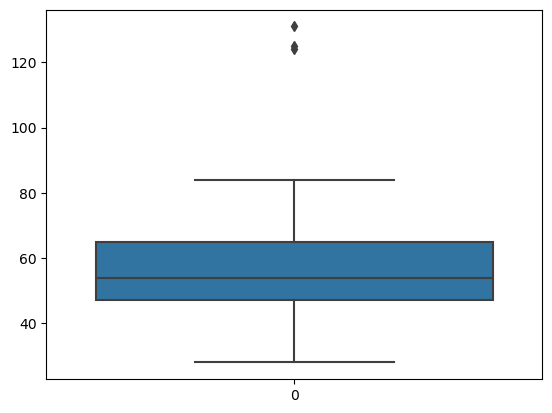

<Figure size 640x480 with 0 Axes>

In [15]:
# A new column called age is made by subracting each value of year_birth from 2024
marketing_data['age'] = 2024 - marketing_data['year_birth']

# Check for age outliar
plt.figure()
sns.boxplot(marketing_data['age'])
plt.show()
plt.clf()

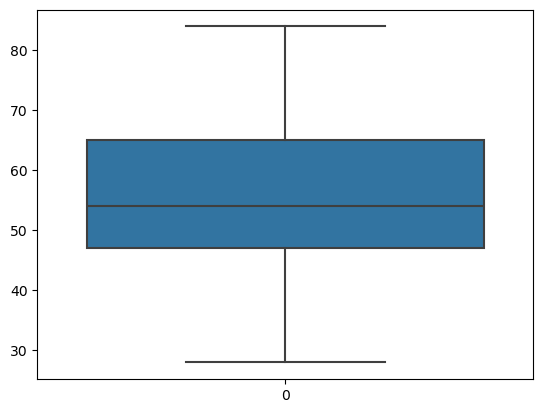

<Figure size 640x480 with 0 Axes>

In [16]:
# Clean age column from outliars
marketing_data = marketing_data[marketing_data['age'] < 100]

# Check for age outliar
plt.figure()
sns.boxplot(marketing_data['age'])
plt.show()
plt.clf()


In [17]:
marketing_data["age"].describe()

count    2212.000000
mean       55.086347
std        11.701599
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max        84.000000
Name: age, dtype: float64

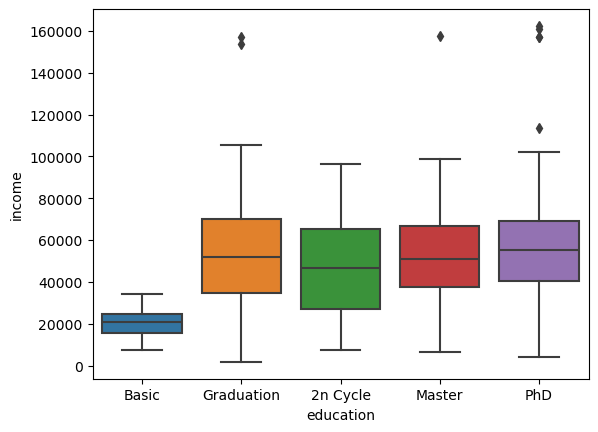

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure()
sns.boxplot(x = marketing_data["education"], y=marketing_data["income"], 
            order=["Basic", "Graduation", "2n Cycle", "Master", "PhD"])
plt.show()
plt.clf()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19460\3475684027.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  marketing_data.hist(ax=ax)


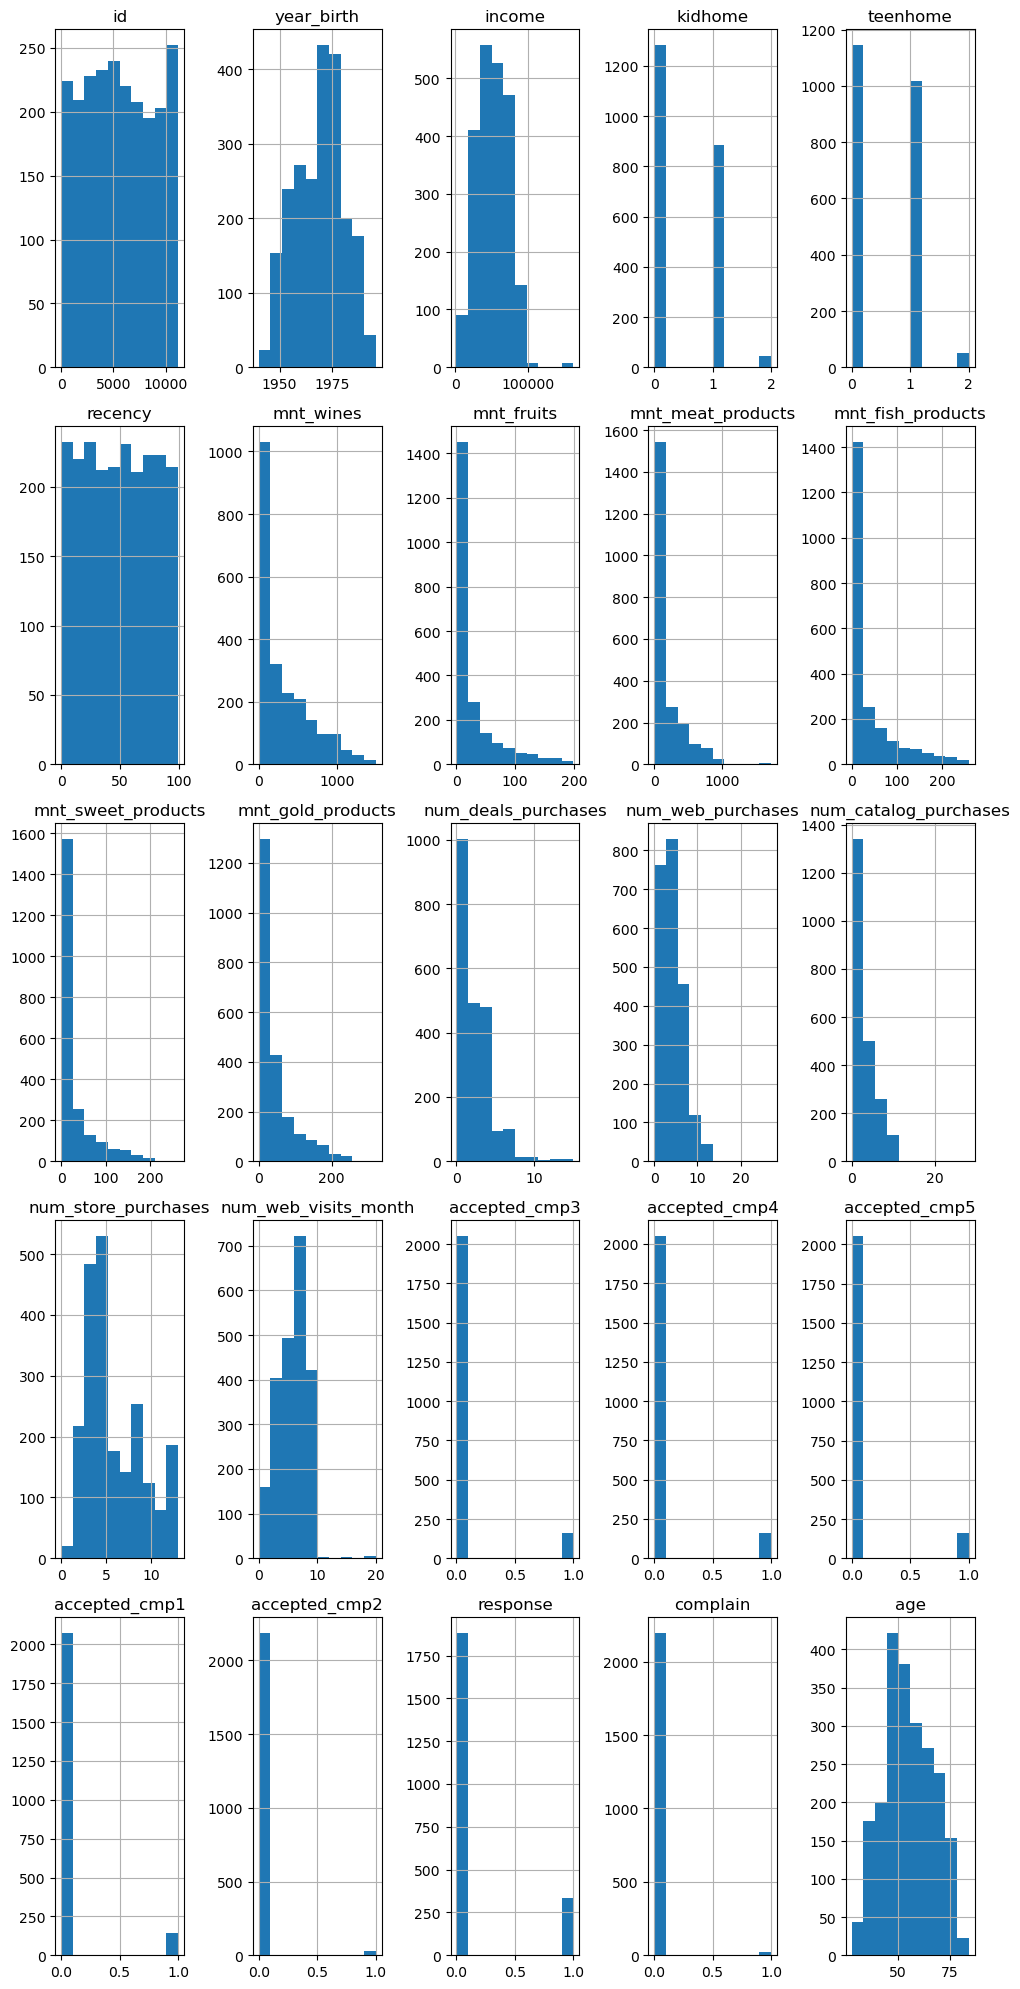

In [19]:
fig = plt.figure(figsize=(10, 20))
ax = fig.gca()
marketing_data.hist(ax=ax)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [20]:
numeric_data = marketing_data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()
correlation_matrix

id  year_birth    income   kidhome  teenhome  \
id                     1.000000    0.005086  0.000905  0.000971 -0.003508   
year_birth             0.005086    1.000000 -0.199977  0.237497 -0.361932   
income                 0.000905   -0.199977  1.000000 -0.514523  0.034565   
kidhome                0.000971    0.237497 -0.514523  1.000000 -0.039066   
teenhome              -0.003508   -0.361932  0.034565 -0.039066  1.000000   
recency               -0.044147   -0.015694  0.007965  0.010623  0.014392   
mnt_wines             -0.018906   -0.164615  0.688209 -0.497203  0.003945   
mnt_fruits             0.010008   -0.013447  0.507354 -0.373258 -0.175905   
mnt_meat_products     -0.003706   -0.033622  0.692279 -0.439031 -0.261134   
mnt_fish_products     -0.022405   -0.041154  0.520040 -0.388643 -0.205235   
mnt_sweet_products    -0.004381   -0.021516  0.523599 -0.377843 -0.163107   
mnt_gold_products     -0.008013   -0.059779  0.388299 -0.354922 -0.018579   
num_deals_purchases   -0.040849   -0.066156 -0.108207  0.216594  0.386805   
num_web_purchases     -0.017232   -0.162265  0.459265 -0.372327  0.162239   
num_catalog_purchases -0.000404   -0.125856  0.696589 -0.504598 -0.112477   
num_store_purchases   -0.011733   -0.138998  0.631424 -0.501863  0.049212   
num_web_visits_month  -0.008610    0.120282 -0.650257  0.447258  0.130985   
accepted_cmp3         -0.035668    0.061097 -0.015152  0.016135 -0.042797   
accepted_cmp4         -0.023692   -0.070035  0.219633 -0.162111  0.038168   
accepted_cmp5         -0.004441    0.019025  0.395569 -0.204582 -0.190119   
accepted_cmp1         -0.017989   -0.011941  0.327524 -0.174261 -0.145198   
accepted_cmp2         -0.014901   -0.007821  0.104036 -0.081911 -0.015633   
response              -0.021112    0.020937  0.161387 -0.077901 -0.154402   
complain               0.031839   -0.004602 -0.027900  0.037067  0.007746   
age                   -0.005086   -1.000000  0.199977 -0.237497  0.361932   

                        recency  mnt_wines  mnt_fruits  mnt_meat_products  \
id                    -0.044147  -0.018906    0.010008          -0.003706   
year_birth            -0.015694  -0.164615   -0.013447          -0.033622   
income                 0.007965   0.688209    0.507354           0.692279   
kidhome                0.010623  -0.497203   -0.373258          -0.439031   
teenhome               0.014392   0.003945   -0.175905          -0.261134   
recency                1.000000   0.015981   -0.005257           0.022914   
mnt_wines              0.015981   1.000000    0.385844           0.568081   
mnt_fruits            -0.005257   0.385844    1.000000           0.546740   
mnt_meat_products      0.022914   0.568081    0.546740           1.000000   
mnt_fish_products      0.000788   0.396915    0.593038           0.572986   
mnt_sweet_products     0.025244   0.389583    0.571474           0.534624   
mnt_gold_products      0.018148   0.391461    0.393459           0.357556   
num_deals_purchases    0.002591   0.009117   -0.134191          -0.121128   
num_web_purchases     -0.005680   0.553663    0.302301           0.306841   
num_catalog_purchases  0.024197   0.634237    0.485611           0.733787   
num_store_purchases   -0.000460   0.640219    0.459875           0.486349   
num_web_visits_month  -0.018965  -0.321616   -0.417741          -0.539194   
accepted_cmp3         -0.032361   0.061360    0.014644           0.018416   
accepted_cmp4          0.017520   0.373349    0.006598           0.091677   
accepted_cmp5          0.000233   0.472889    0.208990           0.375252   
accepted_cmp1         -0.021147   0.351610    0.192417           0.313379   
accepted_cmp2         -0.001429   0.206309   -0.009924           0.043549   
response              -0.200114   0.246320    0.123007           0.237966   
complain               0.005713  -0.036420   -0.002956          -0.021017   
age                    0.015694   0.164615    0.013447           0.033622   

                       

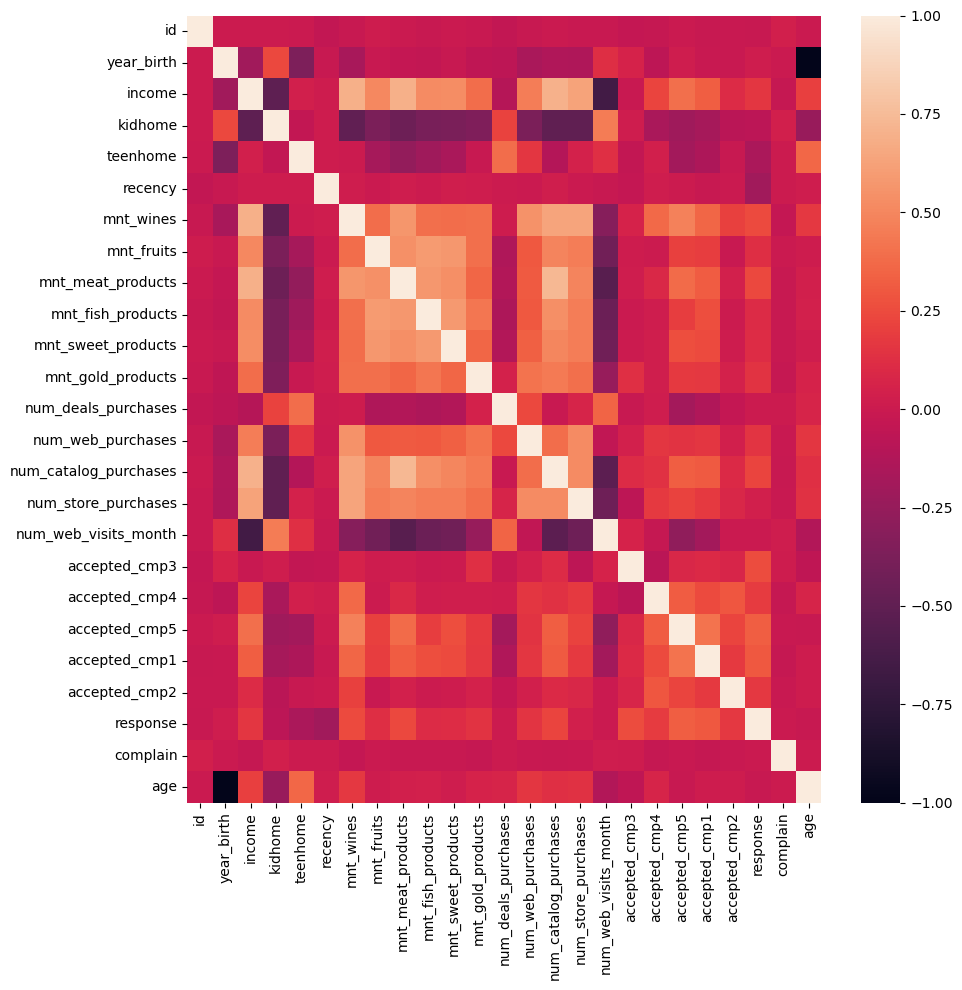

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8))

# heat matrix that shows correlation across all numerical variables
sns.heatmap(data=correlation_matrix,annot=False)
plt.tight_layout()
plt.show()
plt.clf()

In [21]:
# Make list of amount and purchase for visualize
marketing_amount = ['mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products', 'mnt_gold_products']
marketing_purchase = ['num_deals_purchases', 'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases']

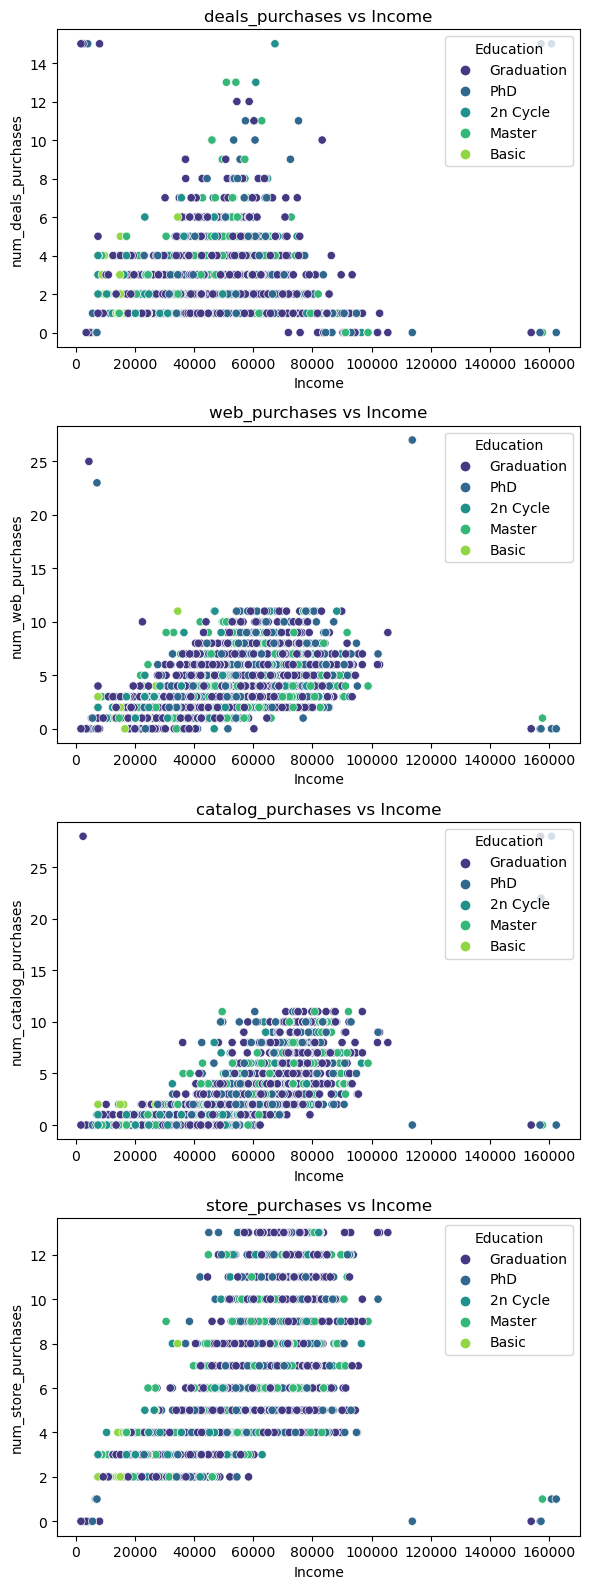

<Figure size 640x480 with 0 Axes>

In [22]:
# Create subplots
fig, axes = plt.subplots(nrows=len(marketing_purchase), ncols=1, figsize=(6, 4 * len(marketing_purchase)))

# Loop through each marketing purchase variable
for i, purchase in enumerate(marketing_purchase):
    # Plot scatterplot with hue
    sns.scatterplot(data=marketing_data, x="income", y=purchase, hue="education", ax=axes[i], palette="viridis")
    axes[i].set_title(f'{purchase[4:]} vs Income')
    axes[i].set_xlabel('Income')
    axes[i].set_ylabel(purchase)
    axes[i].legend(title="Education", loc="upper right")

# Adjust layout
plt.tight_layout()
plt.show()
plt.clf()

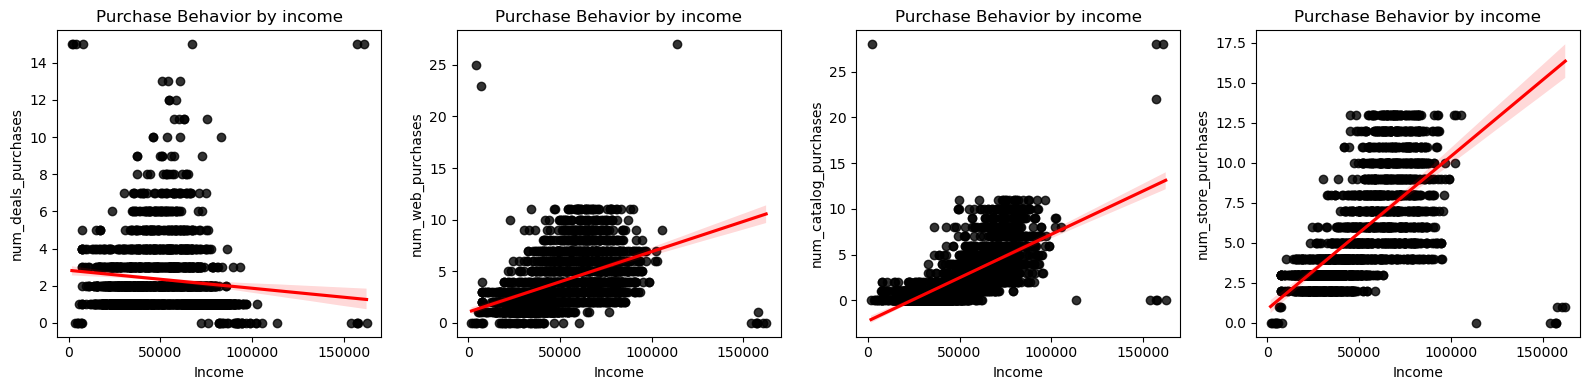

<Figure size 640x480 with 0 Axes>

In [23]:
# To get a better look at the linear relationships, regplot() was used.
fig, axes = plt.subplots(nrows=1, ncols=len(marketing_purchase), figsize=(4 * len(marketing_purchase), 4))

# Loop through each marketing purchase variable
for i, purchase in enumerate(marketing_purchase):
    # Plot regression plot for each subplot
    sns.regplot(data=marketing_data, x="income", y=purchase, ax=axes[i], 
                scatter_kws={"color": "black"}, line_kws={"color": "red"})
    axes[i].set_title("Purchase Behavior by income")
    axes[i].set_xlabel('Income')
    axes[i].set_ylabel(purchase)

# Adjust layout
plt.tight_layout()
fig.savefig('Negative relationship between store purchases & income.png') 
plt.show()
plt.clf()

In [24]:
# add new total_purchases column to marketing_data
marketing_data["total_purchases"] = marketing_data["num_deals_purchases"]+marketing_data["num_catalog_purchases"] + marketing_data["num_web_purchases"] + marketing_data["num_store_purchases"]

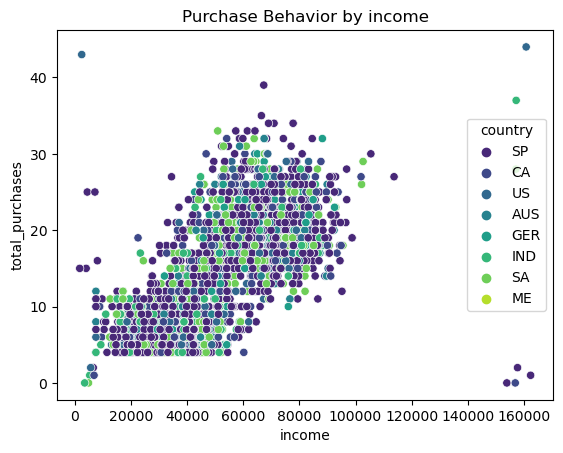

<Figure size 640x480 with 0 Axes>

In [25]:
plt.figure()
# scatterplot of total_purchases vs. income
sns.scatterplot(y=marketing_data["total_purchases"], x=marketing_data["income"], 
                hue=marketing_data['country'], palette="viridis")
plt.title("Purchase Behavior by income")
plt.show()
plt.clf()

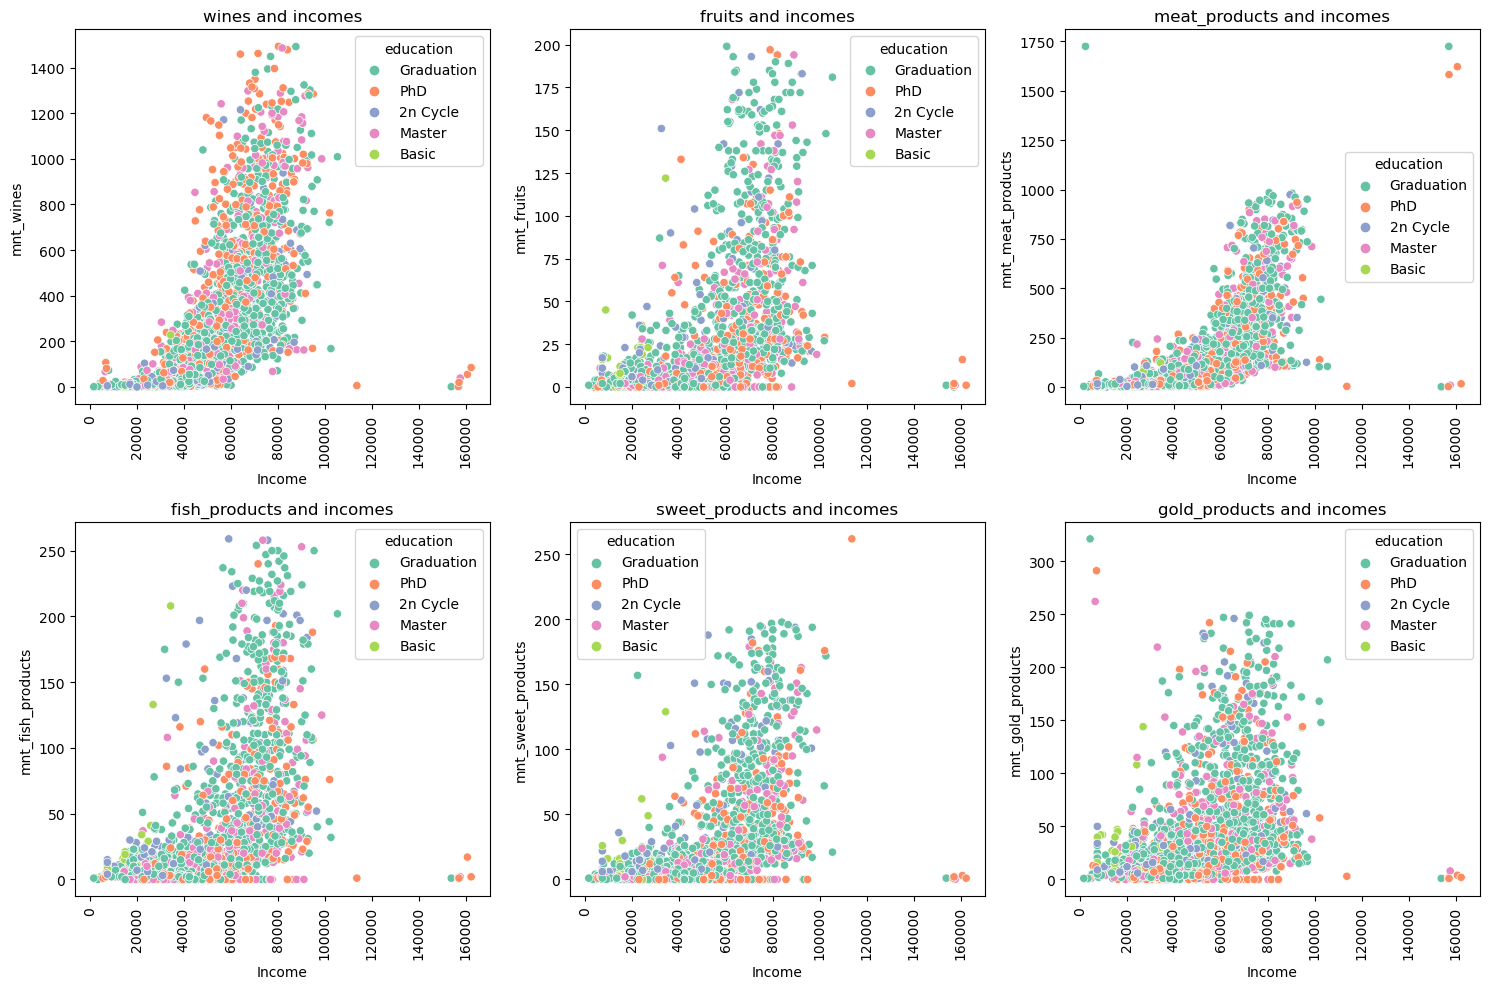

<Figure size 640x480 with 0 Axes>

In [26]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each marketing amount variable
for i, amount in enumerate(marketing_amount):
    # Plot scatter plot for each subplot with hue of education
    sns.scatterplot(data=marketing_data, x="income", y=amount, ax=axes[i], hue="education", palette="Set2")
    axes[i].set_title(f'{amount[4:]} and incomes')
    axes[i].set_xlabel('Income')
    axes[i].set_ylabel(amount)
    axes[i].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
fig.savefig('Relationship between products & income.png') 
plt.show()
plt.clf()

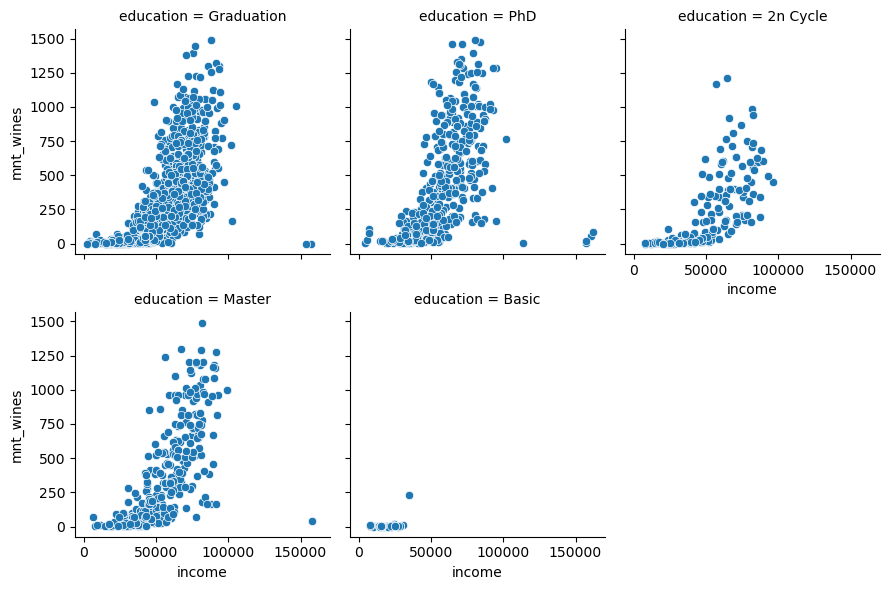

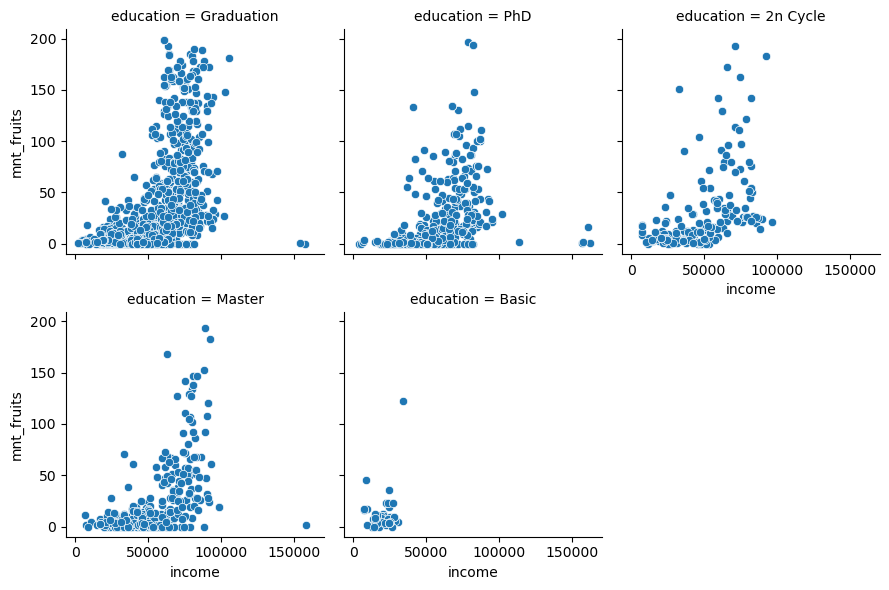

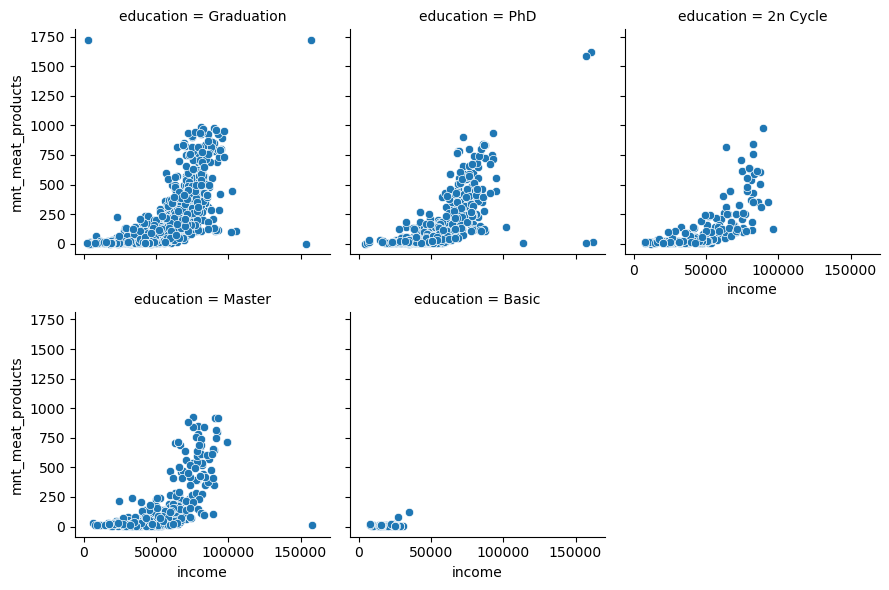

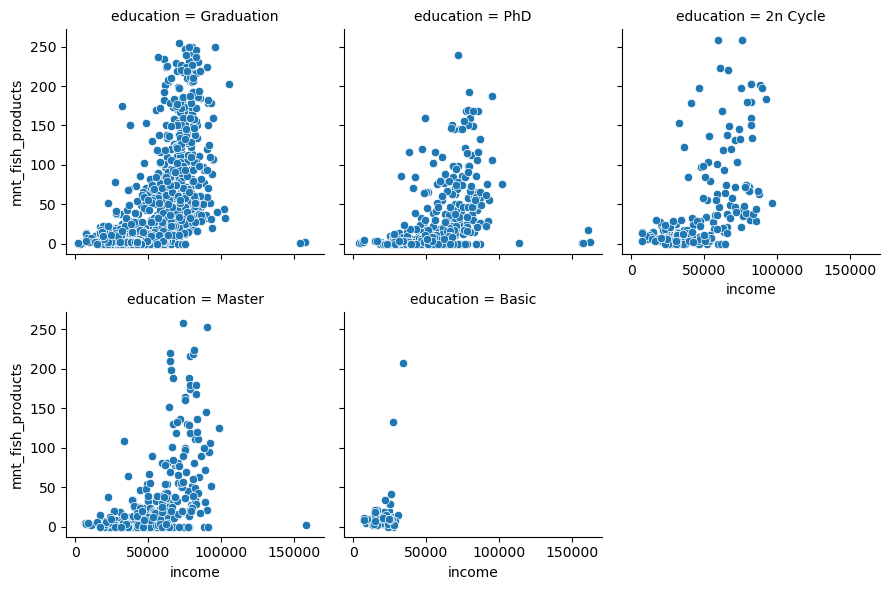

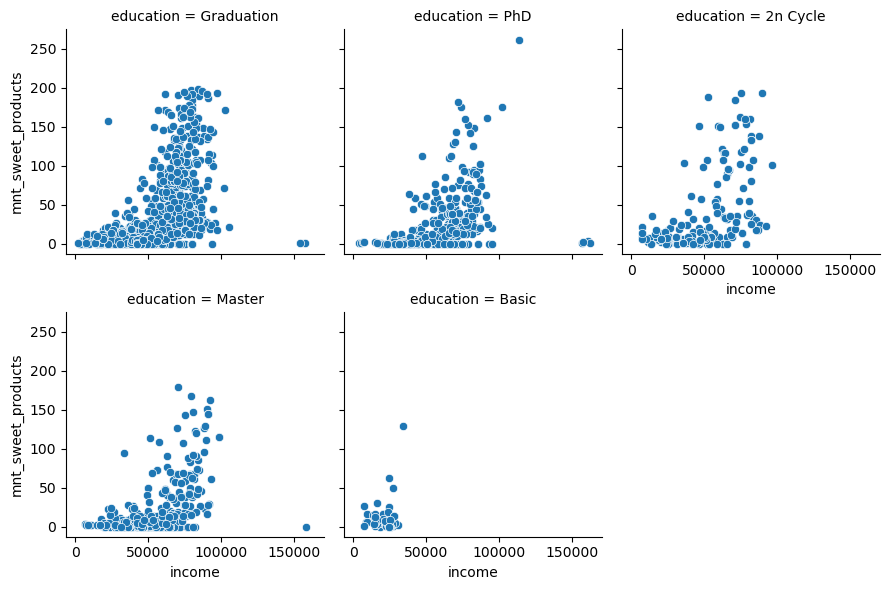

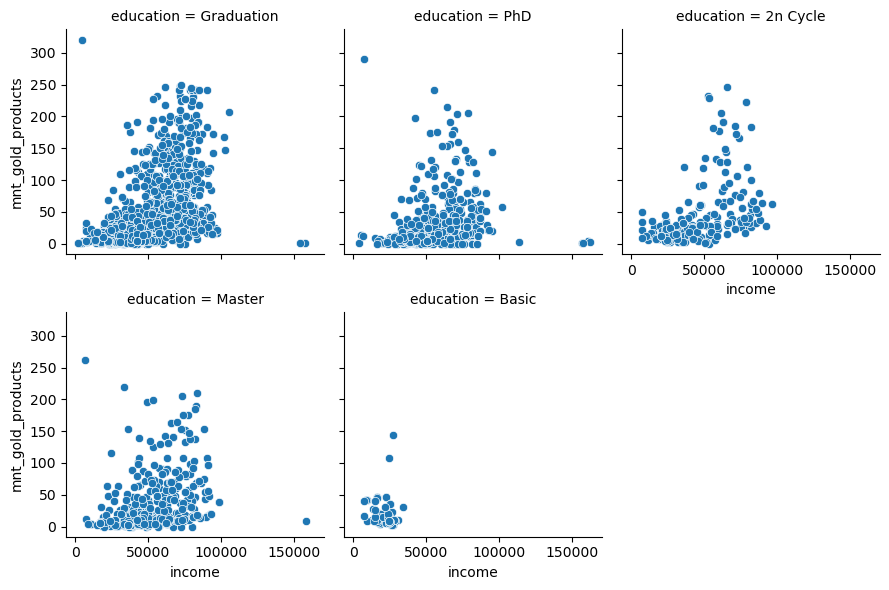

<Figure size 640x480 with 0 Axes>

In [27]:
# dictionary used to contain dynamic variables
variable_names = {}

for i in range(6):
    # defining the facet grid
    variable_names["g{0}".format(i)] = sns.FacetGrid(marketing_data, col="education", col_wrap=3)
    # mapping the facet grid with scatterplots of amounts product vs. income
    variable_names["g{0}".format(i)].map(sns.scatterplot, "income", marketing_amount[i])
plt.show()
plt.clf()

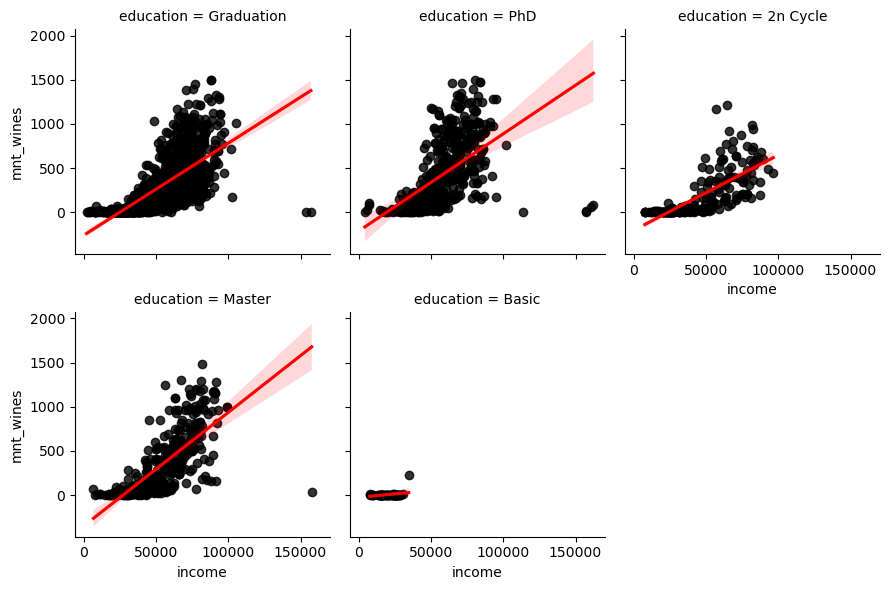

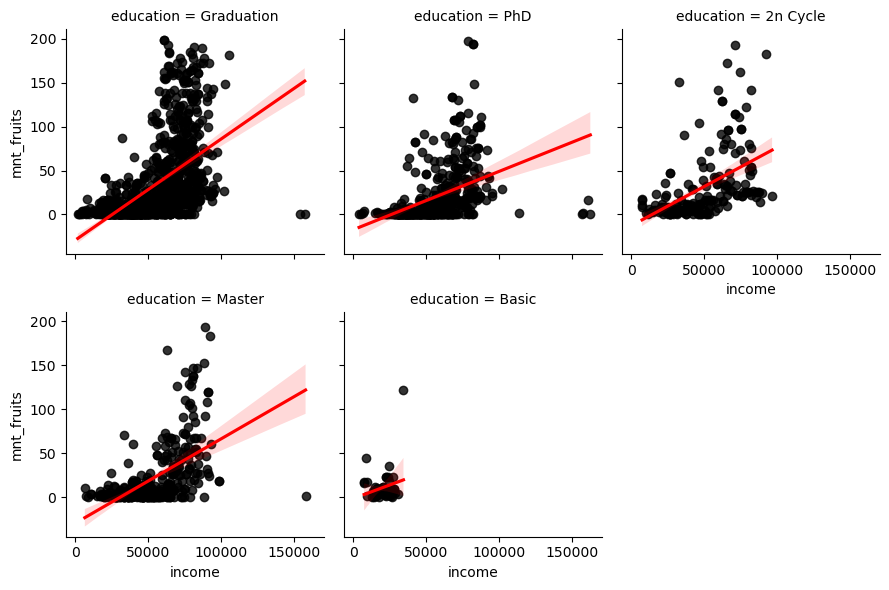

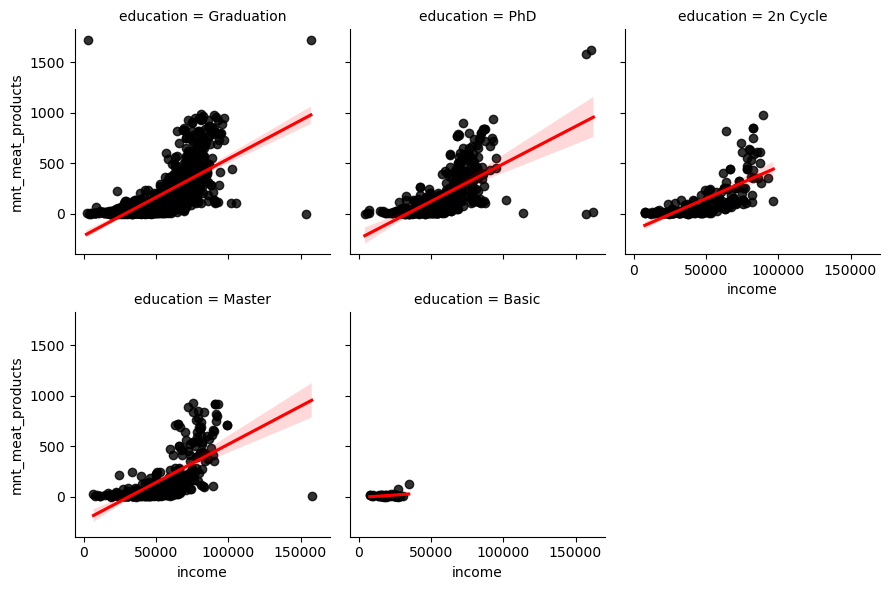

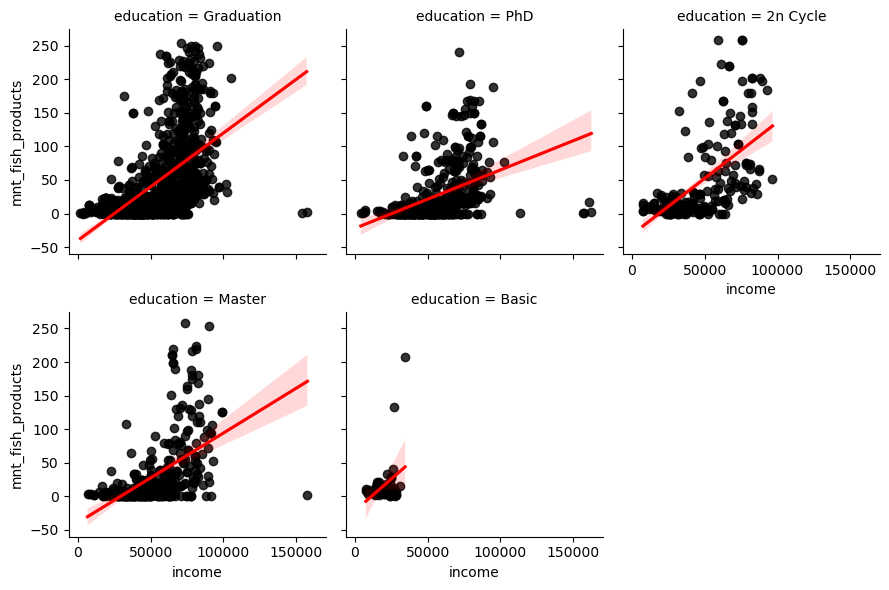

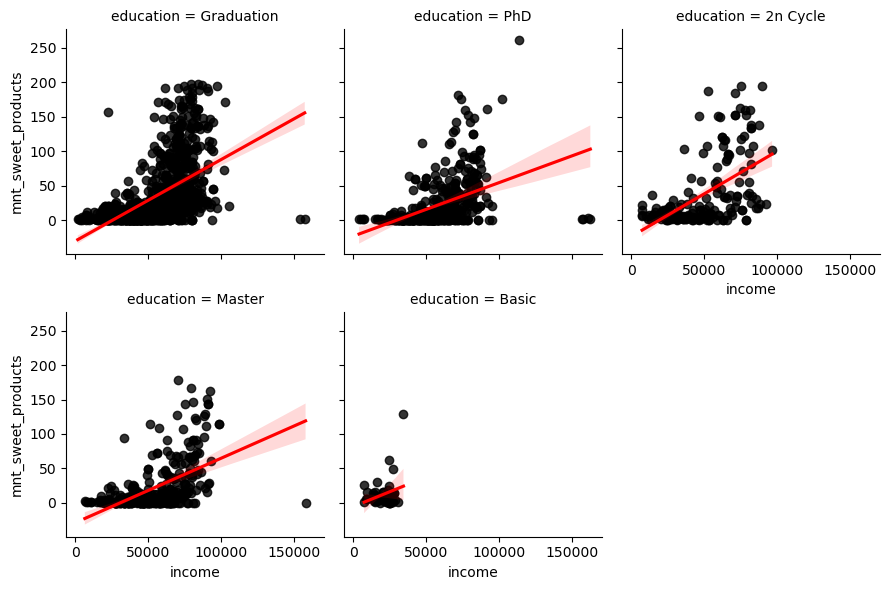

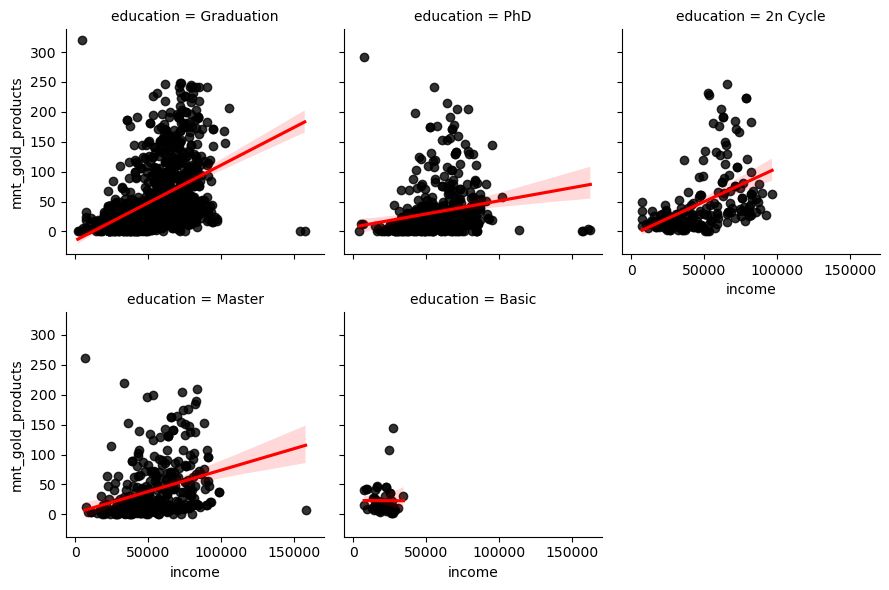

<Figure size 640x480 with 0 Axes>

In [28]:
# Dictionary used to contain dynamic variables
variable_names = {}

for i in range(6):
    # Defining the facet grid
    variable_names["g{0}".format(i)] = sns.FacetGrid(marketing_data, col="education", col_wrap=3)
    # Mapping the facet grid with regplots of amounts product vs. income
    variable_names["g{0}".format(i)].map(sns.regplot, "income", marketing_amount[i], scatter_kws={"color": "black"}, line_kws={"color": "red"})
    

plt.show()
plt.clf()

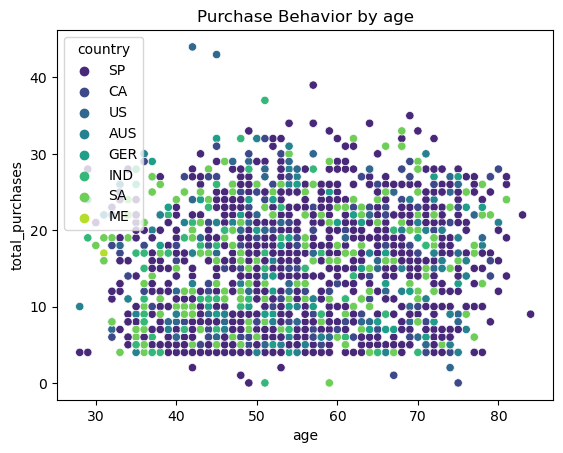

<Figure size 640x480 with 0 Axes>

In [29]:
plt.figure()
# scatterplot of total_purchases vs. income
sns.scatterplot(y=marketing_data["total_purchases"], x=marketing_data["age"], 
                hue=marketing_data['country'], palette="viridis")
plt.title("Purchase Behavior by age")
plt.show()
plt.clf()


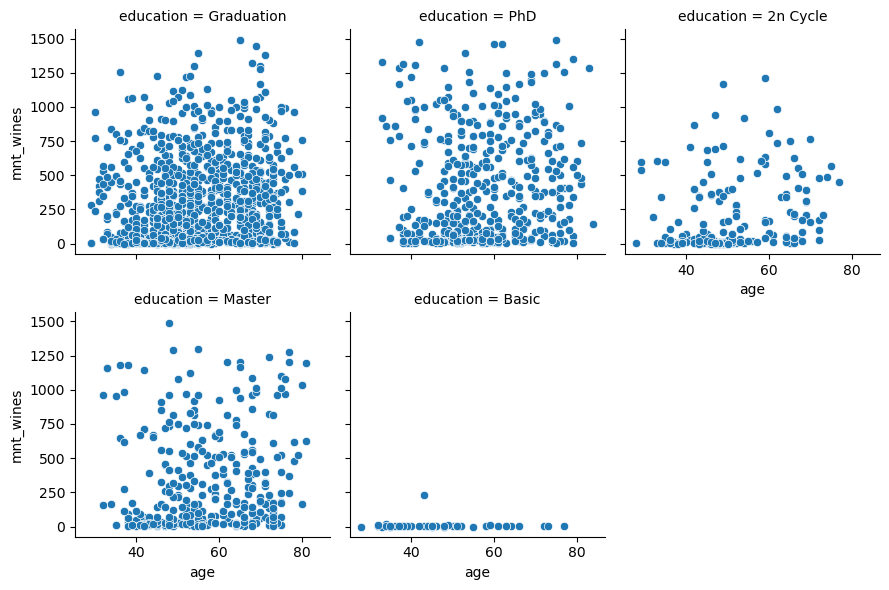

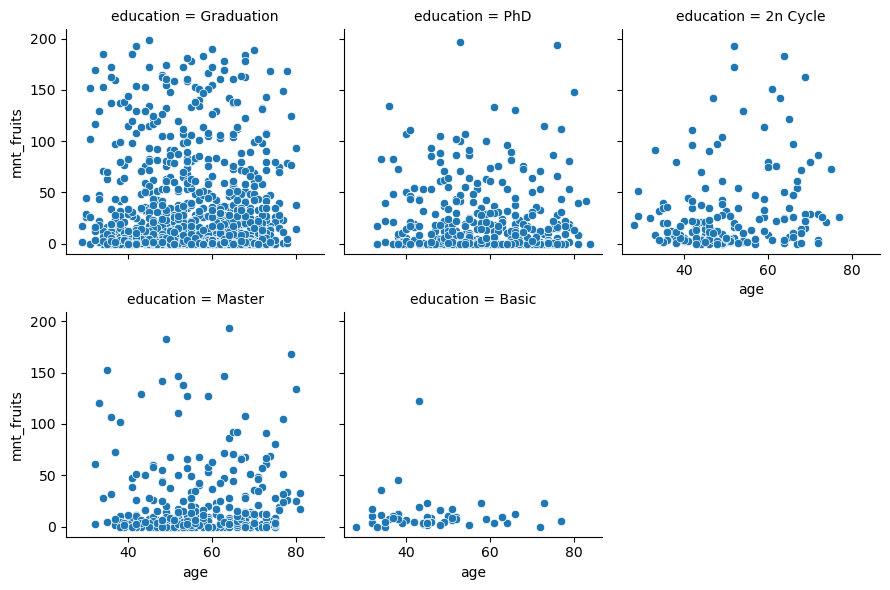

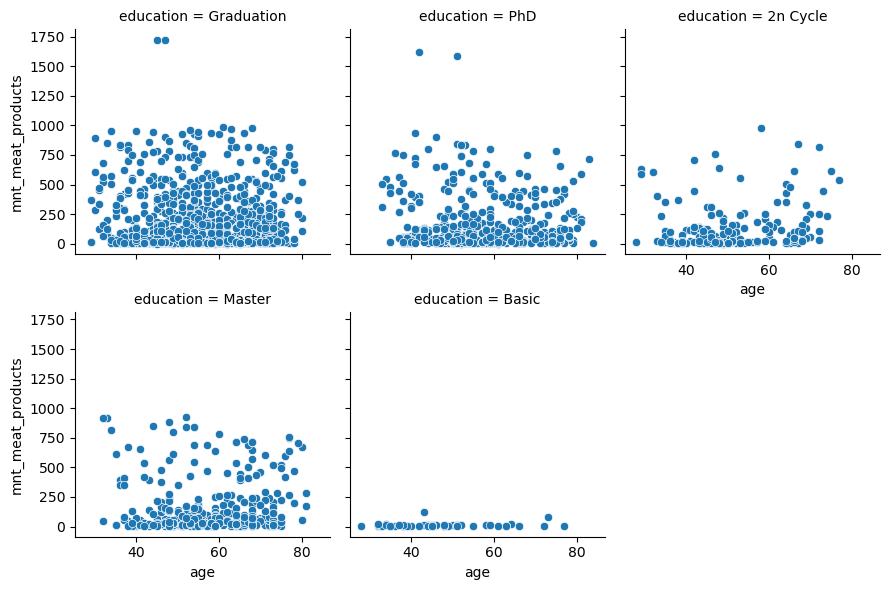

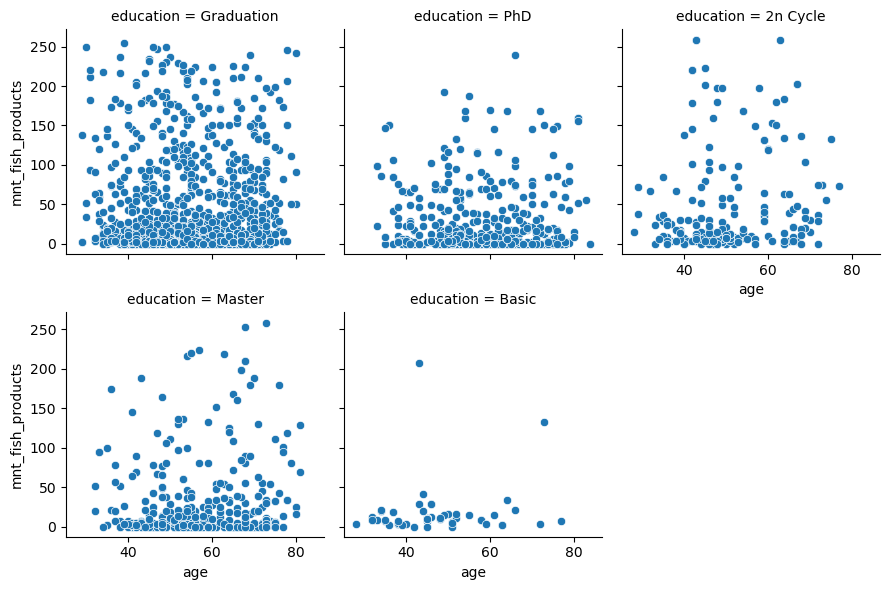

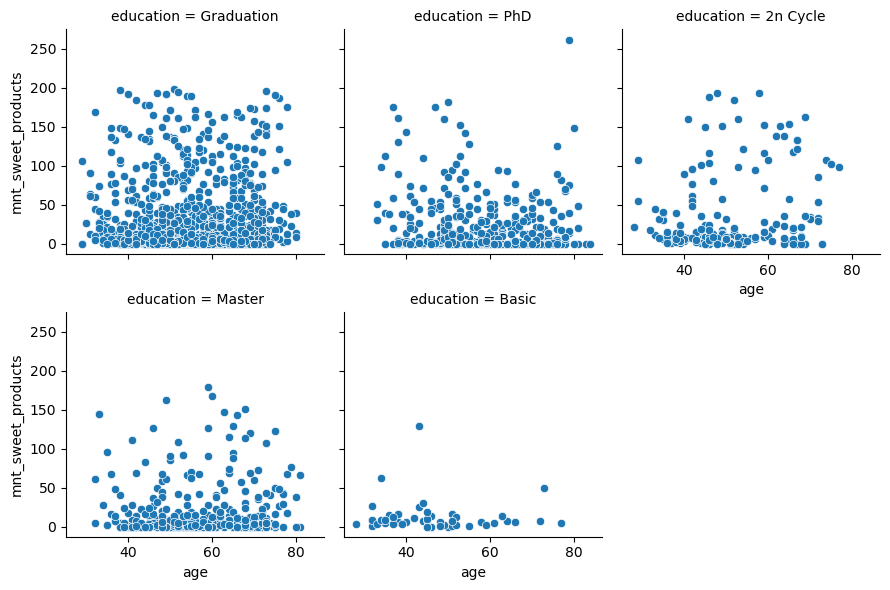

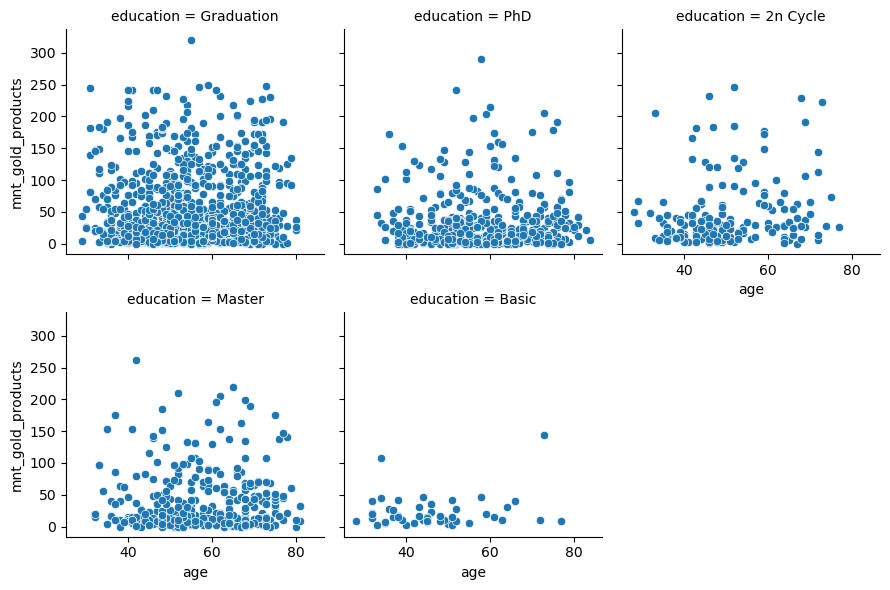

<Figure size 640x480 with 0 Axes>

In [30]:
# dictionary used to contain dynamic variables
variable_names = {}

for i in range(6):
    # defining the facet grid
    variable_names["g{0}".format(i)] = sns.FacetGrid(marketing_data, col="education", col_wrap=3)
    # mapping the facet grid with scatterplots of amounts product vs. income
    variable_names["g{0}".format(i)].map(sns.scatterplot, "age", marketing_amount[i])
plt.show()
plt.clf()

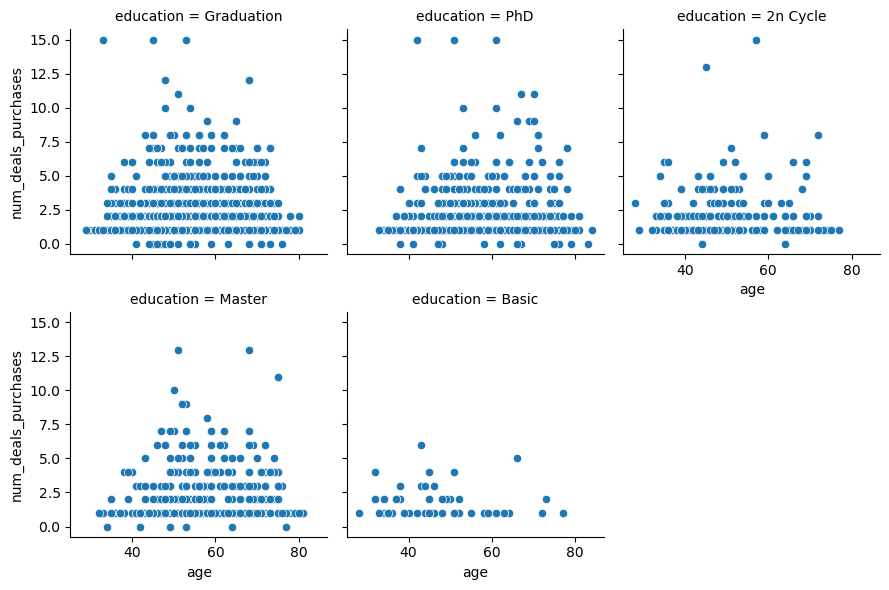

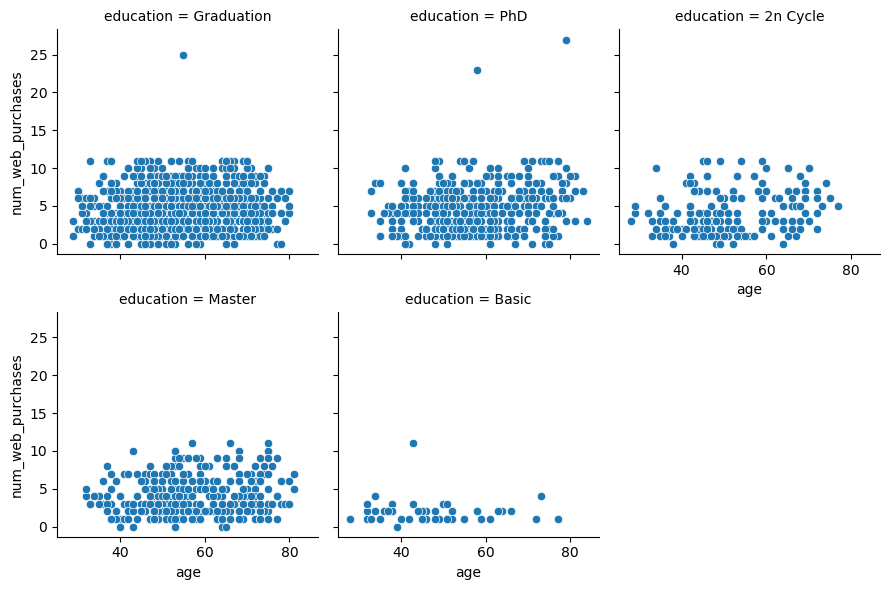

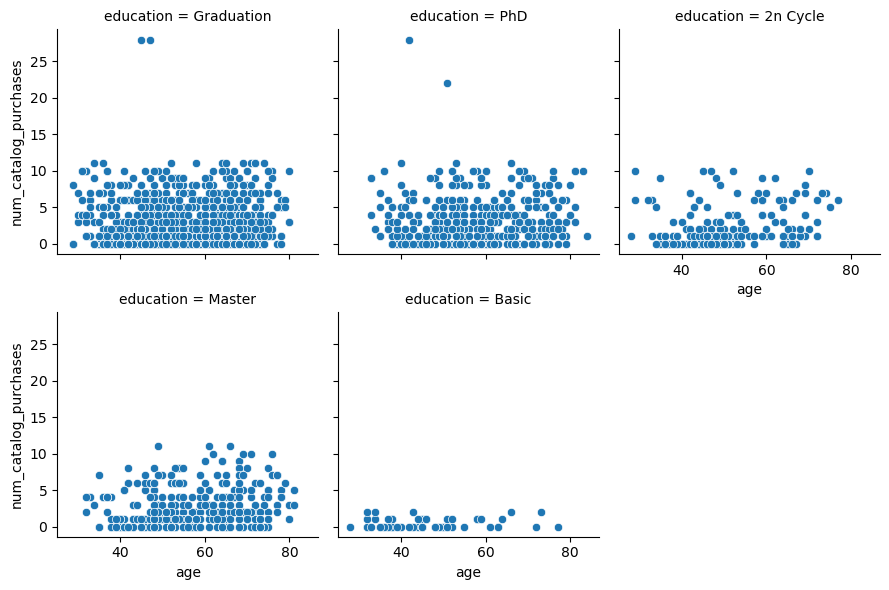

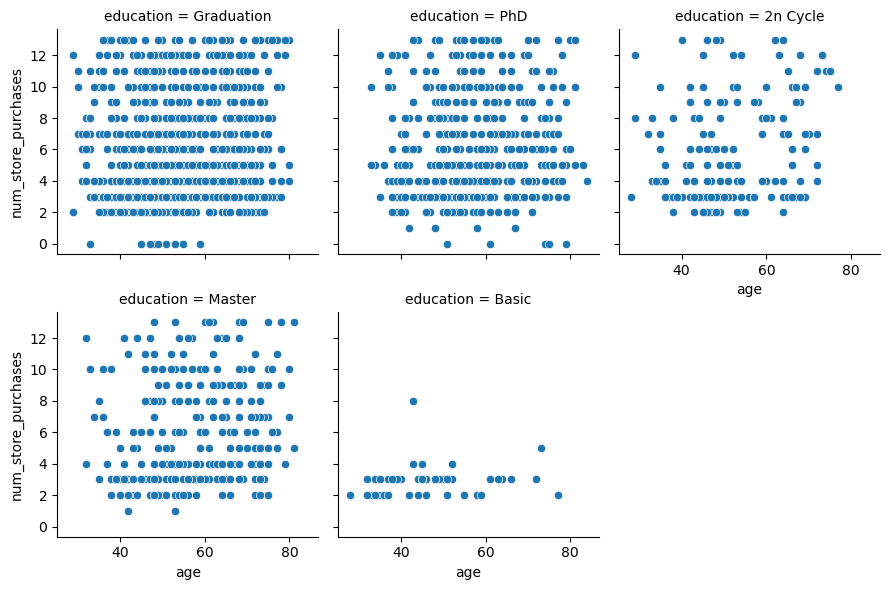

<Figure size 640x480 with 0 Axes>

In [30]:
# dictionary used to contain dynamic variables
variable_names = {}

for i in range(len(marketing_purchase)):
    # defining the facet grid
    variable_names["g{0}".format(i)] = sns.FacetGrid(marketing_data, col="education", col_wrap=3)
    # mapping the facet grid with scatterplots of amounts product vs. income
    variable_names["g{0}".format(i)].map(sns.scatterplot, "age", marketing_purchase[i])
plt.show()
plt.clf()

In [31]:
# function that breaks up each age into a group
def age_groups(age):
    if 18 <= age <= 35 : 
        return '18 to 35' 
    elif 35 < age <= 50 : 
        return '36 to 50'
    elif 50 < age <= 70 : 
        return '51 to 70'
    else : 
        return '71 and Older'

# applying the function to the dataframe
marketing_data['age_group'] = marketing_data['age'].apply(age_groups)

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


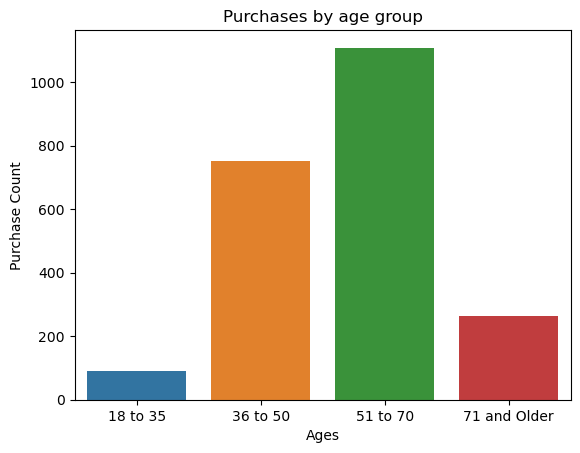

<Figure size 640x480 with 0 Axes>

In [32]:
# Convert 'age_group' to a categorical type with the specified order
age_order = ['18 to 35', '36 to 50', '51 to 70', '71 and Older']
marketing_data['age_group'] = pd.Categorical(marketing_data['age_group'], categories=age_order, ordered=True)

# Plotting the age Group variable in a bar chart
plt.figure()
sns.countplot(x='age_group', data=marketing_data)
plt.title('Purchases by age group')
plt.xlabel('Ages')
plt.ylabel('Purchase Count')
fig.savefig('Age & Purchase.png') 
plt.show()
plt.clf()

In [33]:
# new dataframe that is age and purchase amounts columns
age_plus_amounts = marketing_data.loc[:, ('age', 'mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 
'mnt_sweet_products', 'mnt_gold_products')]
# breaking up the age bins
bins = [18, 35, 50, 70, 150]
# age group labels
labels = ['18 to 35', '36 to 50', '51 to 70', '71 and Older']

# adding age group to the new dataframe as rows
age_plus_amounts['age_group'] = pd.cut(age_plus_amounts.age, bins=bins, labels=labels)
age_plus_amounts = age_plus_amounts.groupby('age_group').sum().reset_index()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19460\3461915503.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_plus_amounts = age_plus_amounts.groupby('age_group').sum().reset_index()


In [34]:
print(age_plus_amounts)

      age_group    age  mnt_wines  mnt_fruits  mnt_meat_products  \
0      18 to 35   2984      25695        2946              21556   
1      36 to 50  33315     182103       18859             112630   
2      51 to 70  65940     363233       29056             182532   
3  71 and Older  19612     104265        7380              52752   

   mnt_fish_products  mnt_sweet_products  mnt_gold_products  
0               4233                2755               4634  
1              26824               19880              29275  
2              40751               29388              49655  
3              11471                7804              13600  


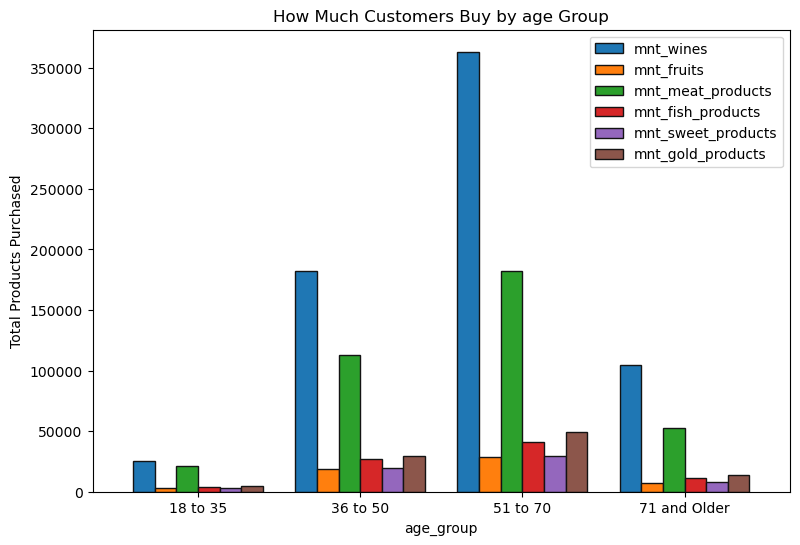

<Figure size 640x480 with 0 Axes>

In [35]:
fig, ax = plt.subplots(figsize=(9, 6))

col_products = [
'mnt_wines', 
'mnt_fruits', 
'mnt_meat_products', 
'mnt_fish_products', 
'mnt_sweet_products', 
'mnt_gold_products'
]

# bar graph of amount of items bought in the store grouped by age group
age_plus_amounts.plot(x='age_group', y=col_products, kind='bar', ax=ax,  width=0.8, edgecolor='#131313')
plt.title("How Much Customers Buy by age Group")
plt.ylabel("Total Products Purchased")
plt.xticks(rotation=360)
fig.savefig('How Much Customers Buy by age Group.png') 
plt.show()
plt.clf()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning

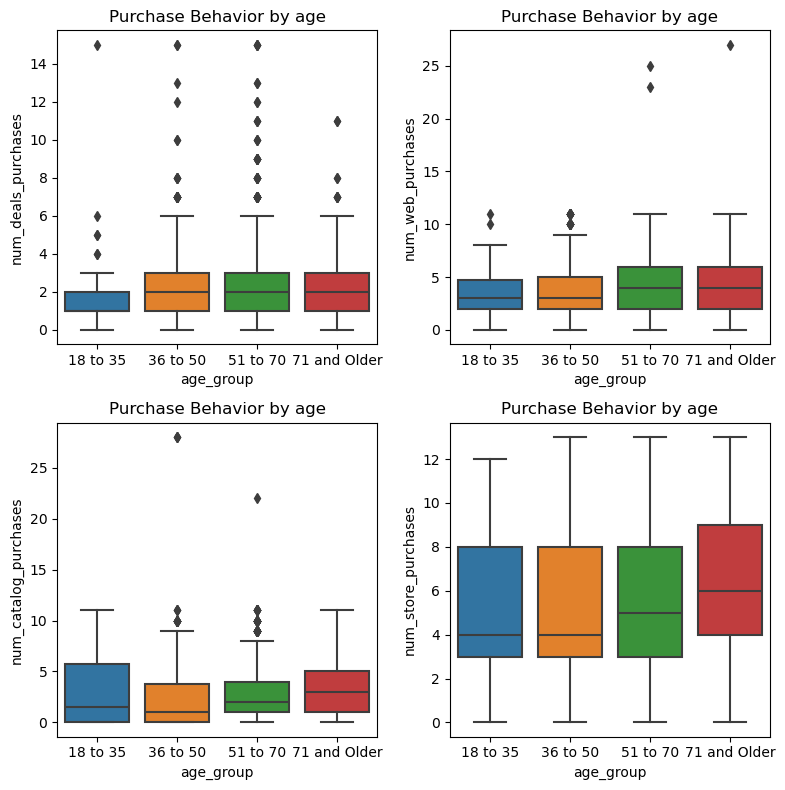

<Figure size 640x480 with 0 Axes>

In [36]:
# num purchases columns list
num_purchases_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]
plot = 0
fig = plt.figure(figsize=(8,8))
# looping through the length of the list
for i in range(len(num_purchases_cols)):
    plot += 1
    # setting up the subplots
    ax = plt.subplot(2, 2, plot)
    # scatterplot of of num purchases vs. age
    sns.boxplot(x=marketing_data["age_group"], y= marketing_data[num_purchases_cols[i]], 
                order=["18 to 35", "36 to 50", "51 to 70", "71 and Older"])
    plt.title("Purchase Behavior by age")

plt.tight_layout()
plt.show()
plt.clf()

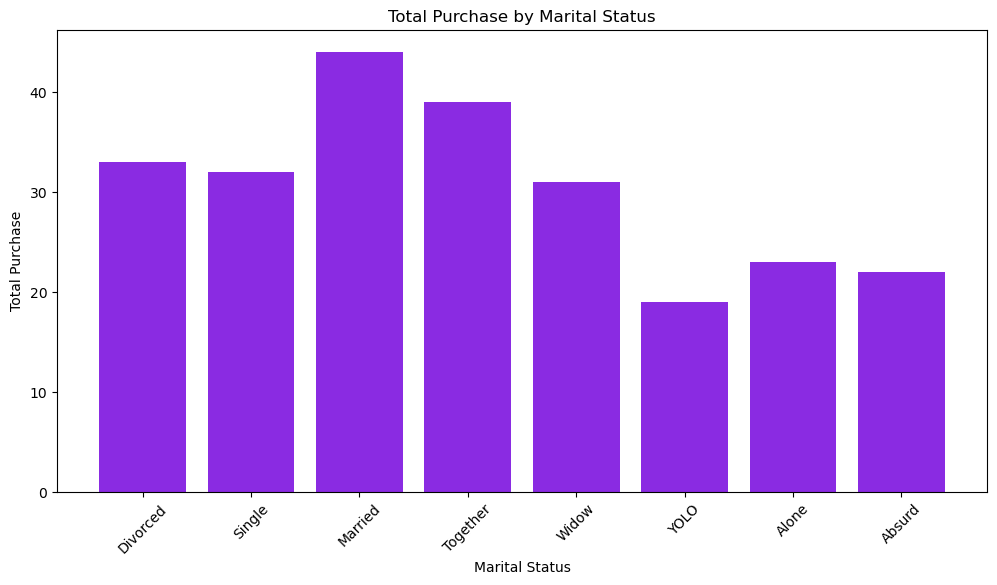

<Figure size 640x480 with 0 Axes>

In [37]:
# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(marketing_data["marital_status"], marketing_data["total_purchases"], color='blueviolet')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Marital Status')
plt.ylabel('Total Purchase')
plt.title('Total Purchase by Marital Status')
plt.show()
plt.clf()

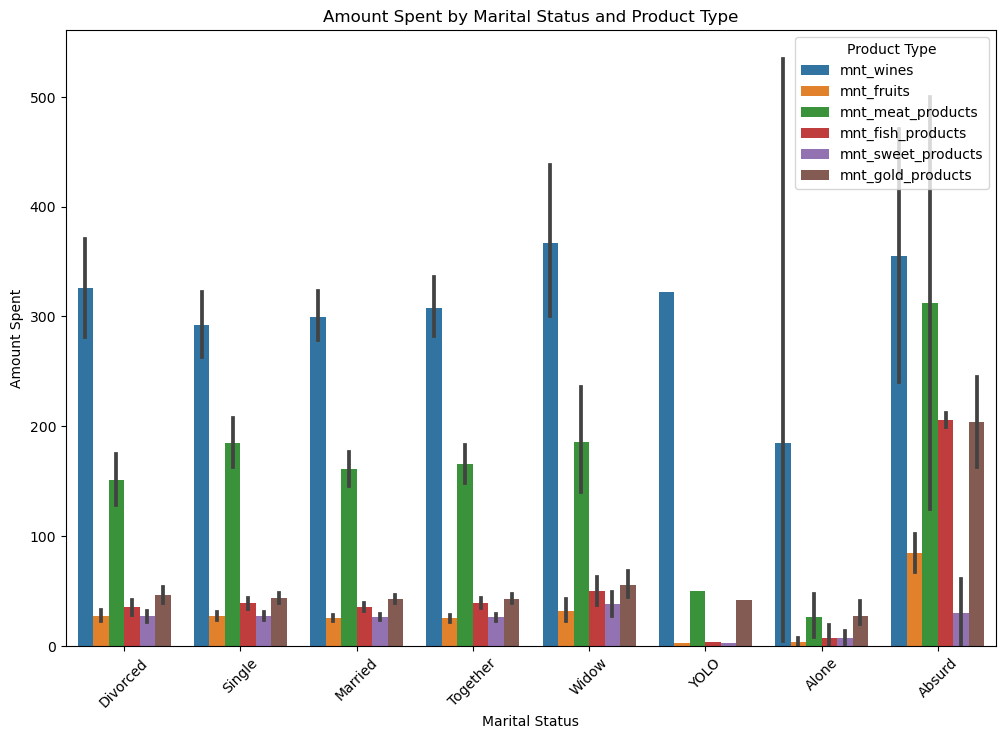

<Figure size 640x480 with 0 Axes>

In [38]:
# Melt the DataFrame
melted_data = marketing_data.melt(id_vars=['marital_status'], value_vars=marketing_amount, var_name='product_type', value_name='amount_spent')

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='marital_status', y='amount_spent', hue='product_type', data=melted_data)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Marital Status')
plt.ylabel('Amount Spent')
plt.title('Amount Spent by Marital Status and Product Type')
plt.legend(title='Product Type', loc='upper right')
fig.savefig('Amount Spent by Marital Status and Product Type.png') 
plt.show()
plt.clf()

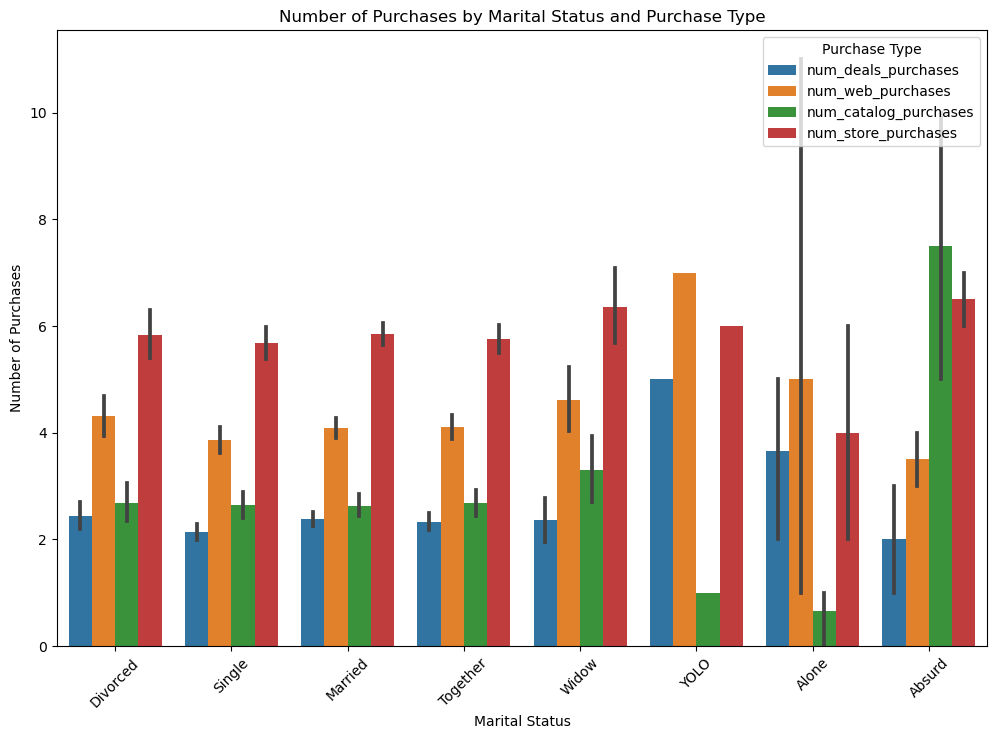

<Figure size 640x480 with 0 Axes>

In [39]:
# Melt the DataFrame
melted_data = marketing_data.melt(id_vars=['marital_status'], value_vars=marketing_purchase, var_name='purchase_type', value_name='num_purchases')

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='marital_status', y='num_purchases', hue='purchase_type', data=melted_data)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Marital Status')
plt.ylabel('Number of Purchases')
plt.title('Number of Purchases by Marital Status and Purchase Type')
plt.legend(title='Purchase Type', loc='upper right')
plt.show()
plt.clf()

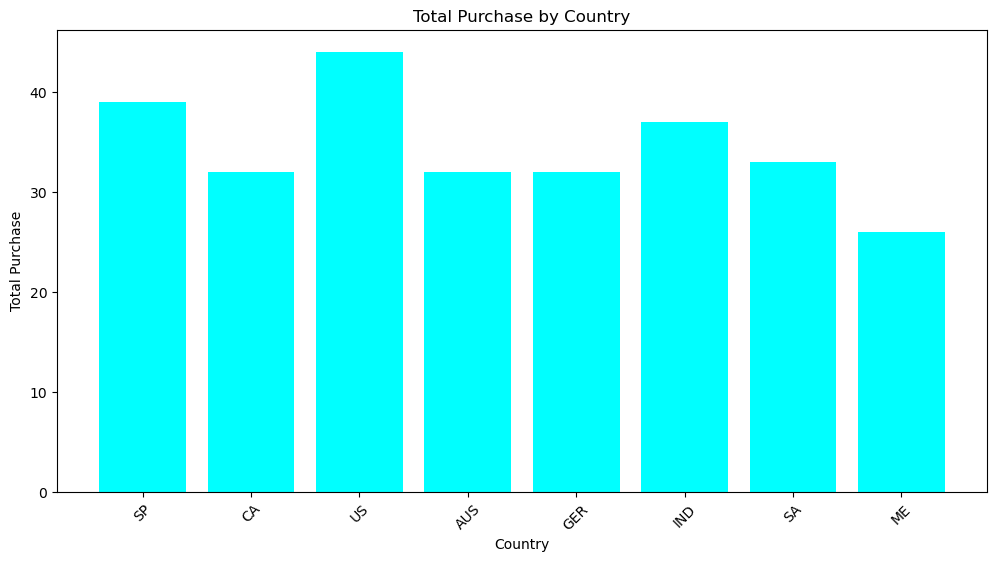

<Figure size 640x480 with 0 Axes>

In [40]:
# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(marketing_data["country"], marketing_data["total_purchases"], color='cyan')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Country')
plt.ylabel('Total Purchase')
plt.title('Total Purchase by Country')

plt.show()
plt.clf()

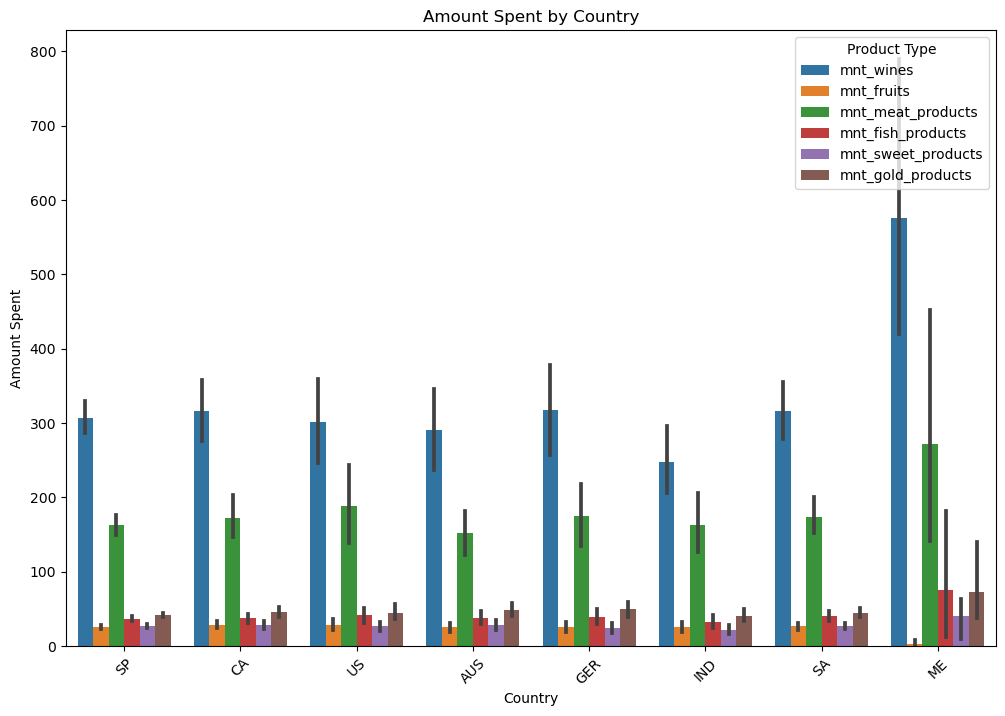

<Figure size 640x480 with 0 Axes>

In [41]:
# Melt the DataFrame
melted_data = marketing_data.melt(id_vars=['country'], value_vars=marketing_amount, var_name='product_type', value_name='amount_spent')

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='country', y='amount_spent', hue='product_type', data=melted_data)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Country')
plt.ylabel('Amount Spent')
plt.title('Amount Spent by Country')
plt.legend(title='Product Type', loc='upper right')
fig.savefig('Amount Spent by country and Product Type.png') 
plt.show()
plt.clf()

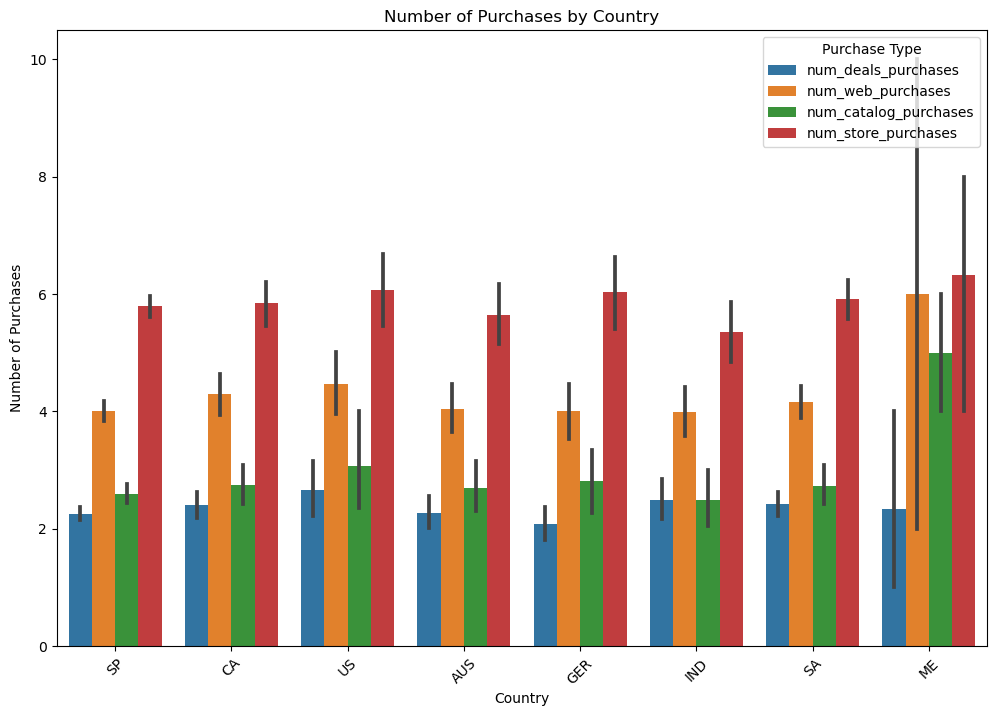

<Figure size 640x480 with 0 Axes>

In [42]:
# Melt the DataFrame
melted_data = marketing_data.melt(id_vars=['country'], value_vars=marketing_purchase, var_name='purchase_type', value_name='num_purchases')

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='country', y='num_purchases', hue='purchase_type', data=melted_data)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Country')
plt.ylabel('Number of Purchases')
plt.title('Number of Purchases by Country')
plt.legend(title='Purchase Type', loc='upper right')
plt.show()
plt.clf()

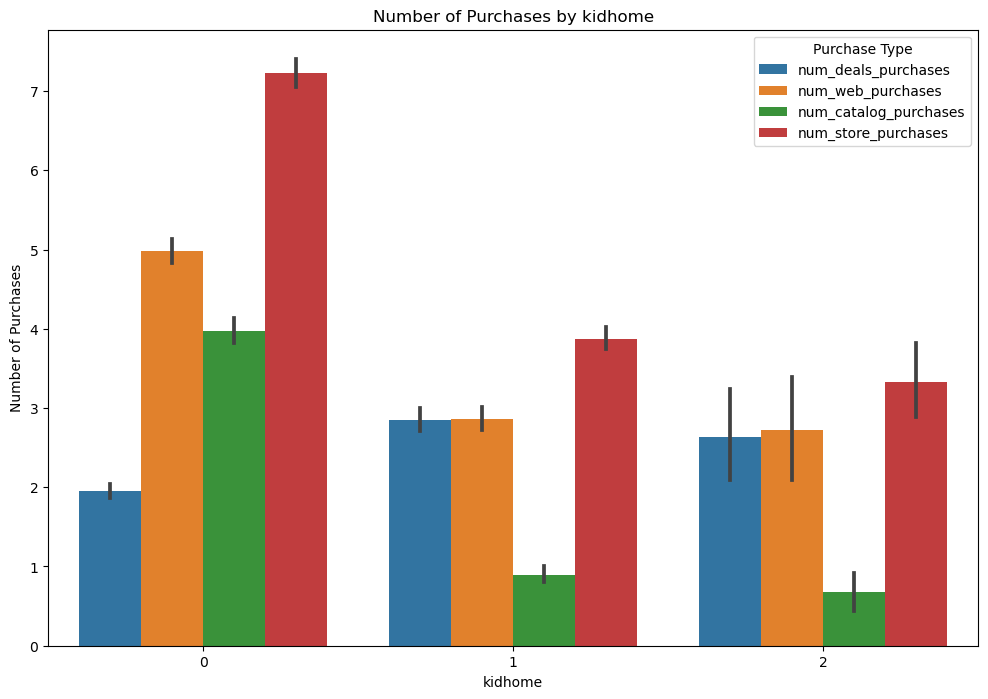

<Figure size 640x480 with 0 Axes>

In [43]:
# Melt the DataFrame
melted_data = marketing_data.melt(id_vars=['kidhome'], value_vars=marketing_purchase, var_name='purchase_type', value_name='num_purchases')

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='kidhome', y='num_purchases', hue='purchase_type', data=melted_data)

plt.xlabel('kidhome')
plt.ylabel('Number of Purchases')
plt.title('Number of Purchases by kidhome')
plt.legend(title='Purchase Type', loc='upper right')
fig.savefig('Number of Purchases by kidhome.png') 
plt.show()
plt.clf()

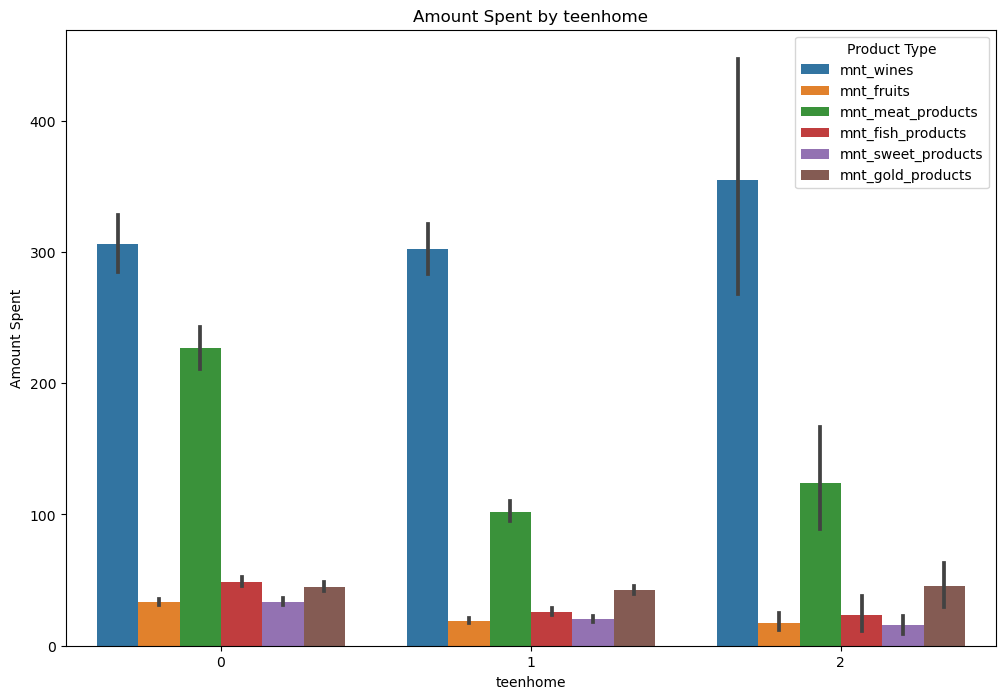

<Figure size 640x480 with 0 Axes>

In [44]:
# Melt the DataFrame
melted_data = marketing_data.melt(id_vars=['teenhome'], value_vars=marketing_amount, var_name='product_type', value_name='amount_spent')

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='teenhome', y='amount_spent', hue='product_type', data=melted_data)

plt.xlabel('teenhome')
plt.ylabel('Amount Spent')
plt.title('Amount Spent by teenhome')
plt.legend(title='Product Type', loc='upper right')
fig.savefig('Number of Purchases by teen at home.png') 
plt.show()
plt.clf()

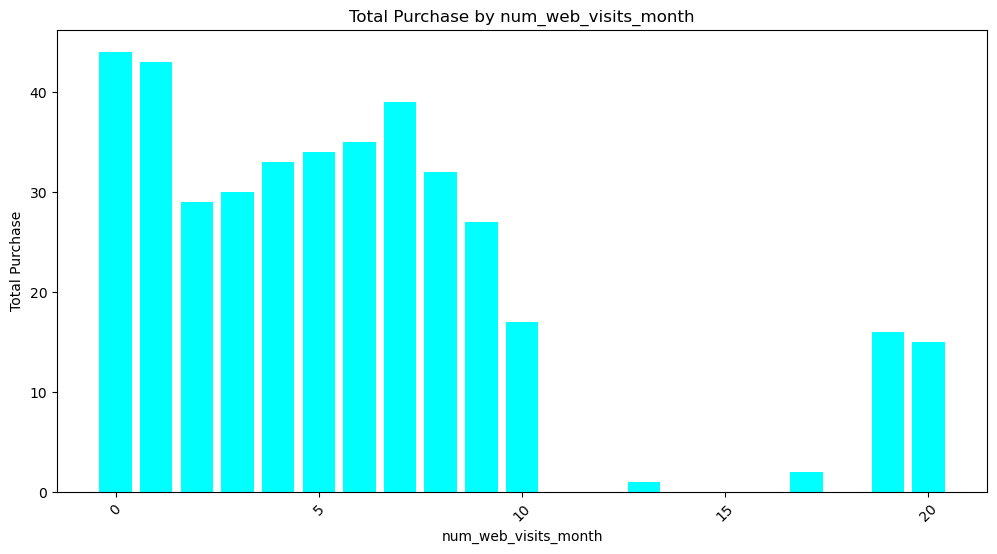

<Figure size 640x480 with 0 Axes>

In [45]:
# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(marketing_data["num_web_visits_month"], marketing_data["total_purchases"], color='cyan')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('num_web_visits_month')
plt.ylabel('Total Purchase')
plt.title('Total Purchase by num_web_visits_month')

plt.show()
plt.clf()


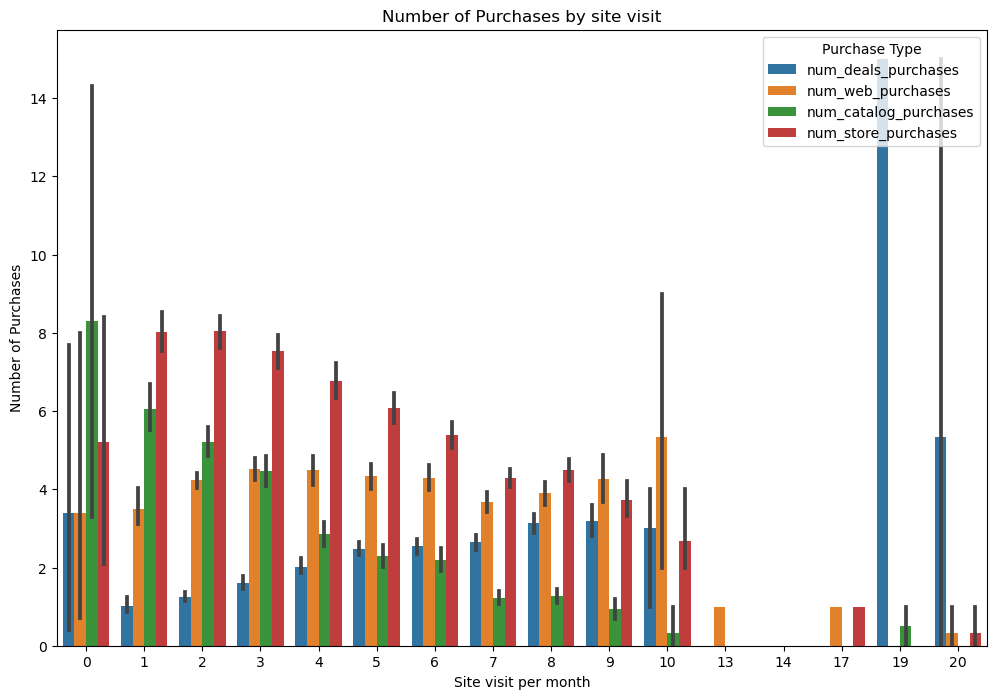

<Figure size 640x480 with 0 Axes>

In [46]:
# Melt the DataFrame
melted_data = marketing_data.melt(id_vars=['num_web_visits_month'], value_vars=marketing_purchase, var_name='purchase_type', value_name='num_purchases')

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='num_web_visits_month', y='num_purchases', hue='purchase_type', data=melted_data)

plt.xlabel('Site visit per month')
plt.ylabel('Number of Purchases')
plt.title('Number of Purchases by site visit')
plt.legend(title='Purchase Type', loc='upper right')
fig.savefig('Number of Purchases by site visit.png') 
plt.show()
plt.clf()


In [47]:
# Findings Overview
# It has been shown income has the strongest relationship with purchase behavior of customers. However, interesting insights about education and age along with age_group have still been noted. These insights would be very helpful to how this store markets deals to their customers and prices items, such as wine since higher income groups tend to dominate alcohol sales. There is also opportunity to increase market to the 18 to 35 and 71 and Older age groups to drive products sales.

# Among all the products Wine has the most sell and most buyers are from ME and also for Widows & Divorce persons.

# Families who have kid at home and people who visit website alot are good catch for deal purchases like family who have teen are good for saling gold products.

In [47]:
marketing_data.to_csv('marketing.csv', index=False)